# 1. Introduction 

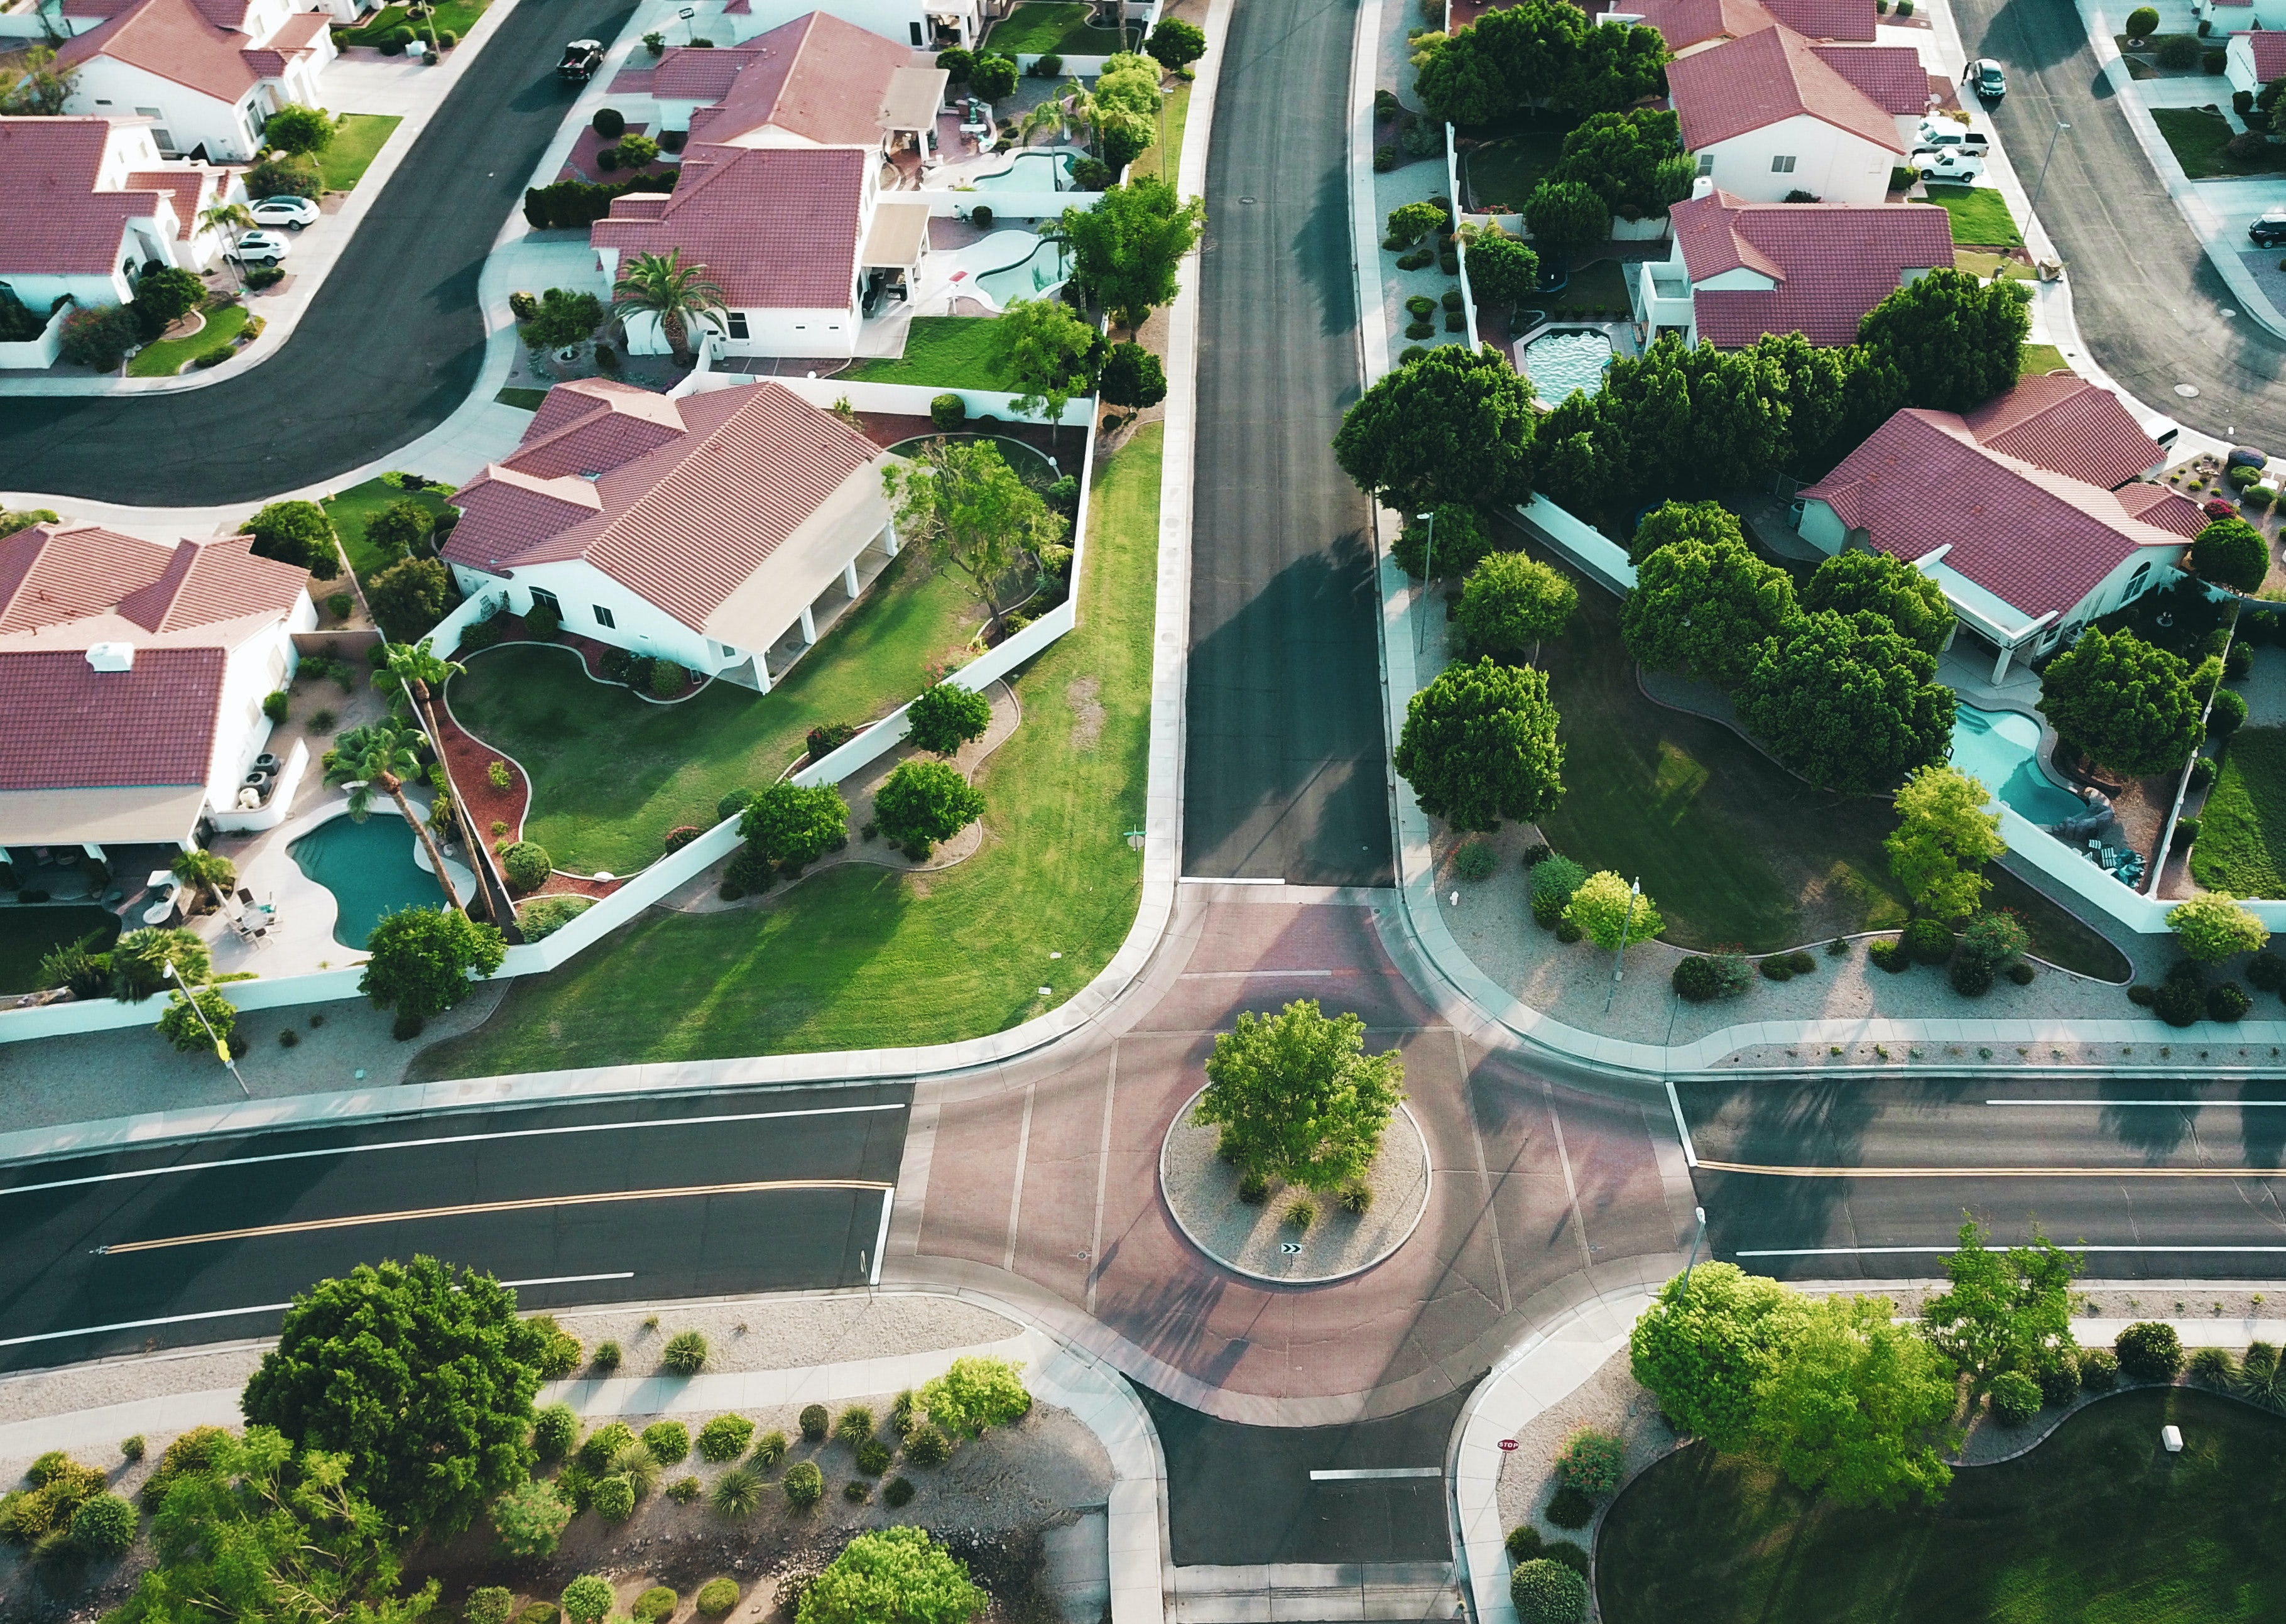

<center>Source: unsplash.com</center>

## 1.1 Business Understanding

According to [Statista.com](https://www.statista.com/statistics/226144/us-existing-home-sales/#:~:text=In%202021%2C%20the%20U.S.%20home,and%20increase%20again%20in%202023.), in 2021, the U.S. home sales surged, reaching the highest value observed since 2006. A total of 6.1 million housing transactions were completed in that year, up from 5.6 million in 2020. The average house price also went up from 2020, $ 391,000 to $ 453,700 in 2021, with this trend expected to increase.

With this surge in housing transcations, as an analyst in Skyline Homes, a real estate company, I'm tasked with providing insights on how different factors affect house prices. The company sells their houses, but also helps connect house sellers to home buyers, ensuring both parties maximize on their investments.

Housing value estimation relies on technical pricing models whereby price is determined by both internal characteristics (bedrooms, bathrooms, living area, etc.) as well as external characteristics (neighboring houses, ZIP code, etc). With the great increase trend of the house price, a model with strong prediction power could help the company make the right decision on pricing their houses and those of their clients. 

Creating such a model would greatly benefit Skyline, and its clients.


## 1.2 Objectives

- To build a model that predicts the price of houses with an acceptably high accuracy.

- To identify variables with the most weight when it comes to predicting the highest market price.

- To advice on the best investment strategy

## 1.3 Data Understanding

The datset used for analysis contains house sale prices for King County in Washington, which includes Seattle. It includes homes sold between May 2014 and May 2015. The data was obtained from Kaggle.
This data contains prices that the houses sold for, and also the featurs the houses had(18 columns).
The data has 21,597 rows and 21 columns.
The description of the columns is listed below, and the descriptive statistics are discussed in data wrangling.
##### Column Names and descriptions for Kings County Data Set
- id - unique identified for a house
- date - house was sold
- price - is prediction target
- bedrooms - of Bedrooms/House
- bathrooms - of bathrooms/bedrooms
- sqft_living - footage of the home
- sqft_lot - footage of the lot
- floors - floors (levels) in house
- waterfront - House which has a view to a waterfront
- view - Has been viewed
- condition - How good the condition is ( Overall )
- grade - overall grade given to the housing unit, based on King County grading system
- sqft_above - square footage of house apart from basement
- sqft_basement - square footage of the basement
- yr_built - Built Year
- yr_renovated - Year when house was renovated
- zipcode - zip
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## 1.3 Questions to answer

1. Do home renovations increase the estimated value of a house?
2. Does Location of the house affect the price of the house?
3. Does condition of the house affect it's price?
4. Does the number of bedrooms and bathrooms affect the price?

# 2. Data Wrangling

## 2.1 Loading Libraries and Dataset

In [118]:
# importing libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn.feature_selection import RFE, RFECV
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the data

df = pd.read_csv("Data/kc_house_data.csv")

In [3]:
# previewing the data

df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [4]:
# expanding the number of visible columns

pd.set_option('display.max_columns', 21)

## 2.2 Descriptive statistics

In [5]:
# checking shape of data

df.shape

(21597, 21)

The dataset has 21,597 rows and 21 columns.

In [6]:
# checking the data types 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The data columns have float, integer and object datatypes. There are some columns such as "waterfront", "view" and "yr_renovated" that have some missing values.

In [7]:
# getting statistics about the numeric columns

df.describe().T

count          mean           std           min  \
id             21597.0  4.580474e+09  2.876736e+09  1.000102e+06   
price          21597.0  5.402966e+05  3.673681e+05  7.800000e+04   
bedrooms       21597.0  3.373200e+00  9.262989e-01  1.000000e+00   
bathrooms      21597.0  2.115826e+00  7.689843e-01  5.000000e-01   
sqft_living    21597.0  2.080322e+03  9.181061e+02  3.700000e+02   
sqft_lot       21597.0  1.509941e+04  4.141264e+04  5.200000e+02   
floors         21597.0  1.494096e+00  5.396828e-01  1.000000e+00   
waterfront     19221.0  7.595859e-03  8.682485e-02  0.000000e+00   
view           21534.0  2.338627e-01  7.656862e-01  0.000000e+00   
condition      21597.0  3.409825e+00  6.505456e-01  1.000000e+00   
grade          21597.0  7.657915e+00  1.173200e+00  3.000000e+00   
sqft_above     21597.0  1.788597e+03  8.277598e+02  3.700000e+02   
yr_built       21597.0  1.971000e+03  2.937523e+01  1.900000e+03   
yr_renovated   17755.0  8.363678e+01  3.999464e+02  0.000000e+00   
zipcode        21597.0  9.807795e+04  5.351307e+01  9.800100e+04   
lat            21597.0  4.756009e+01  1.385518e-01  4.715590e+01   
long           21597.0 -1.222140e+02  1.407235e-01 -1.225190e+02   
sqft_living15  21597.0  1.986620e+03  6.852305e+02  3.990000e+02   
sqft_lot15     21597.0  1.275828e+04  2.727444e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.220000e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068500e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747110e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222310e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

The above shows the count, mean, standard deviation, minimum, 25th percentile, 50th percentile/median, 75th percentile and the maximum of the columns

## 2.3 Data Cleaning

The data cleaning methods to be employed are :
- Validity
- Accuracy
- Completeness
- Consistency
- Uniformity

### 2.3.1 Completeness

This method checks for null values, and fixes them.

In [8]:
# checking for columns with null values

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
# percentage of missing values

(df.isna().sum()/len(df))*100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

The column "yr_renovated" has the highest number of missing values with 3,842 (17.8 %) of missing values, followed by "waterfront" that has 2,376 (11%) and finally,  "view" with 63 (0.29%).

#### 2.3.1.1 Year of Renovation Column

In [10]:
# checking the indices with null values 

df[df["yr_renovated"].isna()]

id        date      price  bedrooms  bathrooms  sqft_living  \
2      5631500400   2/25/2015   180000.0         2       1.00          770   
12      114101516   5/28/2014   310000.0         3       1.00         1430   
23     8091400200   5/16/2014   252700.0         2       1.50         1070   
26     1794500383   6/26/2014   937000.0         3       1.75         2450   
28     5101402488   6/24/2014   438000.0         3       1.75         1520   
...           ...         ...        ...       ...        ...          ...   
21576  1931300412   4/16/2015   475000.0         3       2.25         1190   
21577  8672200110   3/17/2015  1090000.0         5       3.75         4170   
21579  1972201967  10/31/2014   520000.0         2       2.25         1530   
21581   191100405   4/21/2015  1580000.0         4       3.25         3410   
21583  7202300110   9/15/2014   810000.0         4       3.00         3990   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2         10000     1.0         0.0   0.0          3      6         770   
12        19901     1.5         0.0   0.0          4      7        1430   
23         9643     1.0         NaN   0.0          3      7        1070   
26         2691     2.0         0.0   0.0          3      8        1750   
28         6380     1.0         0.0   0.0          3      7         790   
...         ...     ...         ...   ...        ...    ...         ...   
21576      1200     3.0         0.0   0.0          3      8        1190   
21577      8142     2.0         0.0   2.0          3     10        4170   
21579       981     3.0         0.0   0.0          3      8        1480   
21581     10125     2.0         0.0   0.0          3     10        3410   
21583      7838     2.0         0.0   0.0          3      9        3990   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2               0.0      1933           NaN    98028  47.7379 -122.233   
12              0.0      1927           NaN    98028  47.7558 -122.229   
23              0.0      1985           NaN    98030  47.3533 -122.166   
26            700.0      1915           NaN    98119  47.6386 -122.360   
28            730.0      1948           NaN    98115  47.6950 -122.304   
...             ...       ...           ...      ...      ...      ...   
21576           0.0      2008           NaN    98103  47.6542 -122.346   
21577           0.0      2006           NaN    98056  47.5354 -122.181   
21579          50.0      2006           NaN    98103  47.6533 -122.346   
21581             ?      2007           NaN    98040  47.5653 -122.223   
21583           0.0      2003           NaN    98053  47.6857 -122.046   

       sqft_living15  sqft_lot15  
2               2720        8062  
12              1780       12697  
23              1220        8386  
26              1760        3573  
28              1520        6235  
...              ...         ...  
21576           1180        1224  
21577           3030        7980  
21579           1530        1282  
21581           2290       10125  
21583           3370        6814  

[3842 rows x 21 columns]

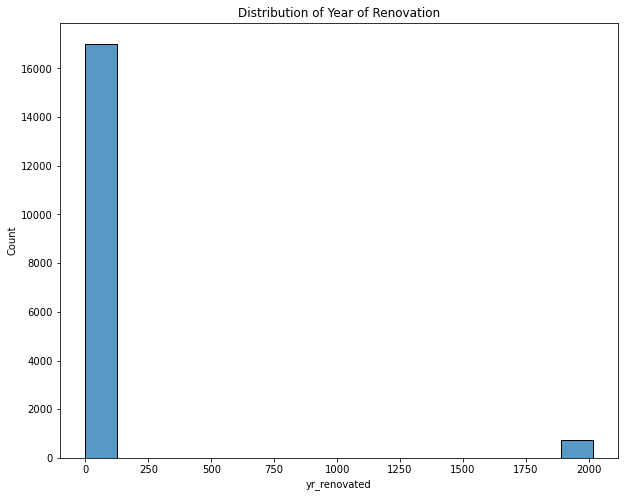

In [11]:
# plotting the distribution

fig, ax = plt.subplots(figsize = (10,8))
sns.histplot(data = df['yr_renovated'])

ax.set_title('Distribution of Year of Renovation');

Most houses have the value of  0, indicating that the houses were not renovated. The houses with years show the year that they were renovated, and shows the year they were renovated. The missing values can be imputed with the median of the data, since  the distribution of the data is skewed.

In [12]:
# calculating the mode of the data

year_renov_median = df['yr_renovated'].median()
year_renov_median

0.0

In [13]:
# imputing the missing values with the median

df['yr_renovated'].fillna(value = year_renov_median, inplace = True)

#### 2.3.1.2 Waterfront Column

In [14]:
# checking the number of null values in waterfront column

df['waterfront'].isna().sum()

2376

The column has 2,376 missing values

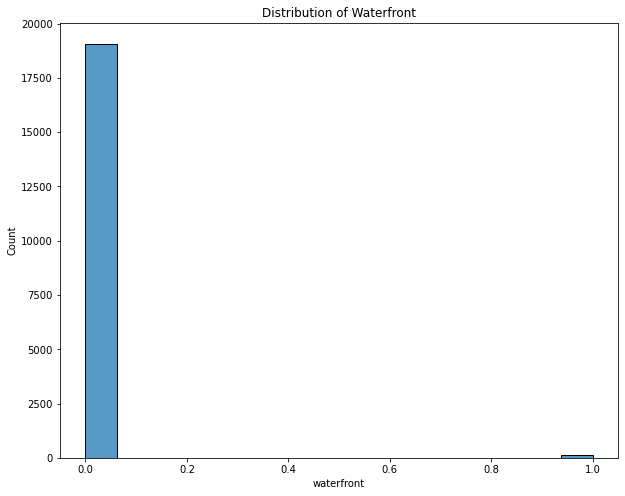

In [15]:
# plotting the distribution

fig, ax = plt.subplots(figsize = (10,8))

sns.histplot(df['waterfront'])

ax.set_title('Distribution of Waterfront');

Most of the properties have a value of zero, which means they have no waterfront. From the histogram above, it is clear the data is skewed, hence, median or mode can be used for imputation. In this case, mode will be used since waterfront is a categorical variable.

In [16]:
# calculating the mode of the data

waterFront_mode = df['waterfront'].mode()[0]
waterFront_mode

0.0

In [17]:
# filling the null values with zero

df['waterfront'].fillna(waterFront_mode, inplace = True)

#### 2.3.1.3 View Column

In [18]:
# checking the missing values in view column

df['view'].isna().sum()

63

The column has 63 missing values

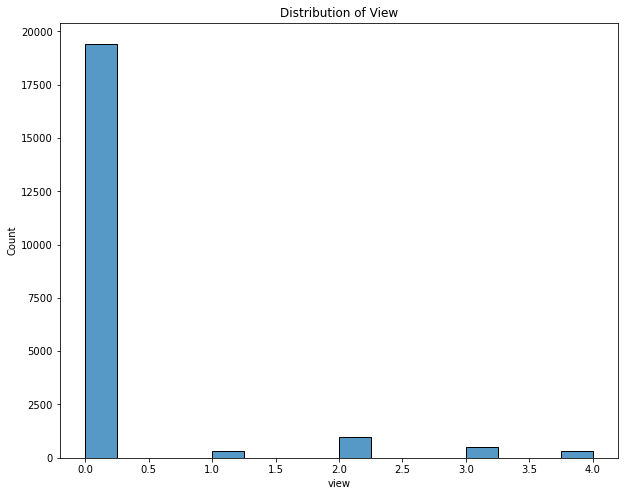

In [19]:
# plotting the distribution

fig, ax = plt.subplots(figsize = (10,8))

sns.histplot(df['view'])

ax.set_title('Distribution of View');

The column data ranges from 0 to 4. Majority of the properties having a view of 0. From the plot, the data is skewed, hence, mode can be used to impute since the column is a categorical variable.

In [20]:
# calculating the mode of tyhe column

view_mode = df['view'].mode()[0]
view_mode

0.0

In [21]:
# filling the null values in the column with the mode

df['view'].fillna(value = view_mode, inplace = True)

In [22]:
# checking to see if all the missing values have been handled

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The data is complete and has no missing values.

### 2.3.2 Uniformity

This describes the extent to which data is specified using the same unit of measure

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Column 'sqft_basement' has an object data type, yet it is a numeric field. This needs to be converted.

In [24]:
# checking the unique values

df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

Upon trying to change the data type to the column and getting an error, this prompted checking the unique values of the columns. It can be noted that there is a symbol '?' in the data. This prevented the conversion, hence must be removed.

In [25]:
df[df['sqft_basement'] == "?"]

id        date      price  bedrooms  bathrooms  sqft_living  \
6      1321400060   6/27/2014   257500.0         3       2.25         1715   
18       16000397   12/5/2014   189000.0         2       1.00         1200   
42     7203220400    7/7/2014   861990.0         5       2.75         3595   
79     1531000030   3/23/2015   720000.0         4       2.50         3450   
112    2525310310   9/16/2014   272500.0         3       1.75         1540   
...           ...         ...        ...       ...        ...          ...   
21442  3226049565   7/11/2014   504600.0         5       3.00         2360   
21447  1760650900   7/21/2014   337500.0         4       2.50         2330   
21473  6021503707   1/20/2015   352500.0         2       2.50          980   
21519  2909310100  10/15/2014   332000.0         4       2.50         2380   
21581   191100405   4/21/2015  1580000.0         4       3.25         3410   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
6          6819     2.0         0.0   0.0          3      7        1715   
18         9850     1.0         0.0   0.0          4      7        1200   
42         5639     2.0         0.0   0.0          3      9        3595   
79        39683     2.0         0.0   0.0          3     10        3450   
112       12600     1.0         0.0   0.0          4      7        1160   
...         ...     ...         ...   ...        ...    ...         ...   
21442      5000     1.0         0.0   0.0          3      7        1390   
21447      4907     2.0         0.0   0.0          3      7        2330   
21473      1010     3.0         0.0   0.0          3      8         980   
21519      5737     2.0         0.0   0.0          3      7        2380   
21581     10125     2.0         0.0   0.0          3     10        3410   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
6                 ?      1995           0.0    98003  47.3097 -122.327   
18                ?      1921           0.0    98002  47.3089 -122.210   
42                ?      2014           0.0    98053  47.6848 -122.016   
79                ?      2002           0.0    98010  47.3420 -122.025   
112               ?      1980           0.0    98038  47.3624 -122.031   
...             ...       ...           ...      ...      ...      ...   
21442             ?      2008           0.0    98103  47.6931 -122.330   
21447             ?      2013           0.0    98042  47.3590 -122.081   
21473             ?      2008           0.0    98117  47.6844 -122.387   
21519             ?      2010           0.0    98023  47.2815 -122.356   
21581             ?      2007           0.0    98040  47.5653 -122.223   

       sqft_living15  sqft_lot15  
6               2238        6819  
18              1060        5095  
42              3625        5639  
79              3350       39750  
112             1540       11656  
...              ...         ...  
21442           2180        5009  
21447           2300        3836  
21473            980        1023  
21519           2380        5396  
21581           2290       10125  

[454 rows x 21 columns]

It can be noted that the column has a character '?' in 454 rows.


In [26]:
# replacing the ? with NaN values

df['sqft_basement'].replace(to_replace= "?", value = np.nan, inplace = True)

In [27]:
# converting the data type from object to float

df['sqft_basement'] = df['sqft_basement'].astype('float64')

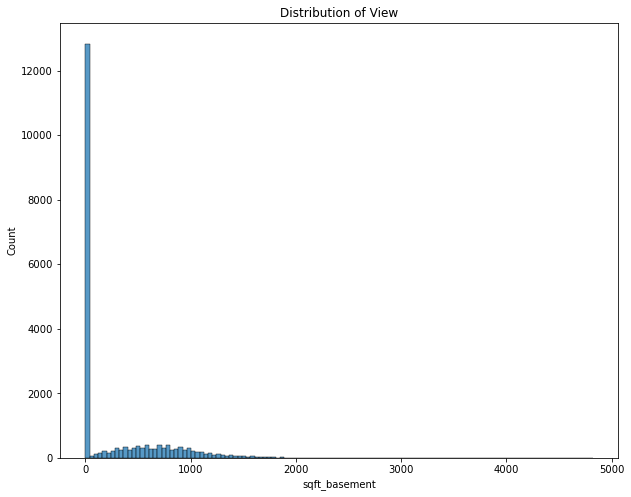

In [28]:
# plotting the distribution

fig, ax = plt.subplots(figsize = (10,8))

sns.histplot(df['sqft_basement'])

ax.set_title('Distribution of View');

It can be noted that most homes have a value of zero for basement size. This means that most homes do not have a basement. From the distribution plot, one can notice that the data is skewed, hence, median can be used to impute the missing values since the data is numeric in continuous in nature.

In [29]:
# calculating the median of the column

basement_median = df['sqft_basement'].median()
basement_median

0.0

In [30]:
# filling the null values

df['sqft_basement'].fillna(value = basement_median, inplace = True)

It could also be noted that the column 'date' has the data type object, which is untrue. This needs to be converted to the right data type.

In [31]:
# checking the data type

df['date'].dtypes

dtype('O')

In [32]:
# changing the data type

df['date'] = pd.to_datetime(df['date'])

In [33]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

The data thas the right data types.

### 2.3.3 Consistency

This describes the extent to which data is consistent within the same dataset and across multiple datasets.

In [34]:
# checking for duplicates in the data

df.duplicated().sum()

0

The data has no duplicates

### 2.3.4 Validity

This checks whether the data conforms to the contstraints applied by the business rules

The columns Id serves the purpose of uniquely identifying the different transactions. It serves no other purpose in the analysis, hence, can be dropped.

In [35]:
# dropping the columns

df.drop(["id"], axis = 1, inplace = True)

In [36]:
# checking the new shape of the data

df.shape

(21597, 20)

The data now has 21,597 rows and 20 columns.

## 2.6 Analysis Pre-Processing

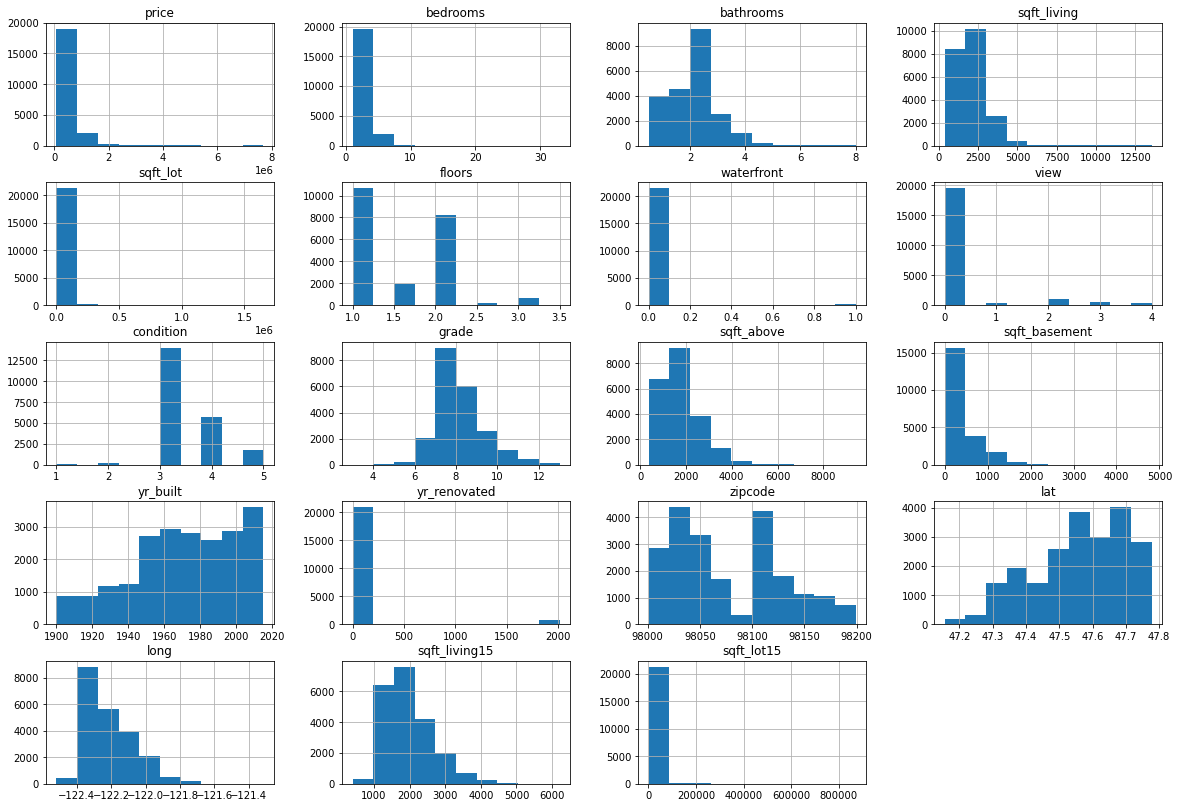

In [37]:
# plotting the distribution of the data

df.hist(figsize = [20,14]);

Most of the rows in 'yr_renovated' have the value 0, meaning they have not been renovated. It can be converted to a feature called 'renovated'. For rows where ('yr_renovated' == 0), 'renovated' will have the value 0, indicating that no renovation took place.For rows where ('yr_renovated'> 0), 'renovated' will have the value 1, indicating that renovation took place.

In [38]:
# creating a new column with data on house renovations

df['renovated'] = np.where(df['yr_renovated'] == 0, 0, 1)

In [39]:
# previewing the data

df.head(5)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0         0.0   0.0          3      7        1180            0.0      1955   
1         0.0   0.0          3      7        2170          400.0      1951   
2         0.0   0.0          3      6         770            0.0      1933   
3         0.0   0.0          5      7        1050          910.0      1965   
4         0.0   0.0          3      8        1680            0.0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0           0.0    98178  47.5112 -122.257           1340        5650   
1        1991.0    98125  47.7210 -122.319           1690        7639   
2           0.0    98028  47.7379 -122.233           2720        8062   
3           0.0    98136  47.5208 -122.393           1360        5000   
4           0.0    98074  47.6168 -122.045           1800        7503   

   renovated  
0          0  
1          1  
2          0  
3          0  
4          0

It can be noted that there is an extreme outlier under the 'bedrooms' column

In [40]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

Looking closely at the 33 value

In [41]:
df[df['bedrooms'] == 33]

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
15856 2014-06-25  640000.0        33       1.75         1620      6000   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
15856     1.0         0.0   0.0          5      7        1040          580.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
15856      1947           0.0    98103  47.6878 -122.331           1330   

       sqft_lot15  renovated  
15856        4700          0

It can be noted that the house that has 33 bedrooms and 1.75 bathrooms, has the living area of only 1620 square feet with only one floor.This observation is most likely an entry error, and can be eliminated.

In [42]:
# dropping tyhe row with 33 bedrooms

df = df[df['bedrooms'] != 33]

 The ‘yr built’ column can be converted to a feature called ‘age’ which would indicate the age of the house at the time of sale. This age can be binned into 6 classses in preparation for modelling.

In [43]:
# extracting the sale year from the date column

df['sale_year'] = df['date'].dt.year

In [44]:
# calculating the age of the house

df["house_age"] = df['sale_year'] - df['yr_built']

In [45]:
df['age_category'] = 0
df.loc[df['house_age'] < 20, 'age_category'] = 1
df.loc[(df['house_age'] > 20) & (df['house_age'] < 40), 'age_category'] = 2
df.loc[(df['house_age'] > 40) & (df['house_age'] < 60), 'age_category'] = 3
df.loc[(df['house_age'] > 60) & (df['house_age'] < 80), 'age_category'] = 4
df.loc[(df['house_age'] > 80) & (df['house_age'] < 100), 'age_category'] = 5
df.loc[(df['house_age'] > 100) & (df['house_age'] < 120), 'age_category'] = 6

The 'view' column can be converted to a feature called 'viewed' that indicates whether the house has been been viewed or not, before sale.

In [46]:
# creating a new column

df['viewed'] = np.where(df['view'] == 0, 0, 1)

In [47]:
df.head(2)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   

   waterfront  view  condition  ...  zipcode      lat     long  sqft_living15  \
0         0.0   0.0          3  ...    98178  47.5112 -122.257           1340   
1         0.0   0.0          3  ...    98125  47.7210 -122.319           1690   

   sqft_lot15  renovated  sale_year  house_age  age_category  viewed  
0        5650          0       2014         59             3       0  
1        7639          1       2014         63             4       0  

[2 rows x 25 columns]

In [48]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovated', 'sale_year', 'house_age',
       'age_category', 'viewed'],
      dtype='object')

It can be noted that 'sqft_basement' has a lot of zeros, indicating that the house has no basement. It is also noted that 'sqft_living' is the sum of 'sqft_basement' and 'sqft_above', hence, can always be calculated. This column can be converted to 'basement', indicating whether a house has a basement or not.

In [49]:
# creating a new column

df['basement'] = np.where(df['sqft_basement'] == 0, 0, 1)

Since some new features have been created, the redundant columns can now be dropped.

In [50]:
df.drop(labels = ['sqft_basement', 'yr_renovated', 'yr_built' , 'date', 'sale_year', 'view', 'house_age'], axis = 1, inplace = True)

In [51]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
renovated        0
age_category     0
viewed           0
basement         0
dtype: int64

In [52]:
df.to_csv('CleanedKingCountyData.csv')

# 3. Exploratory Data Analysis(EDA)

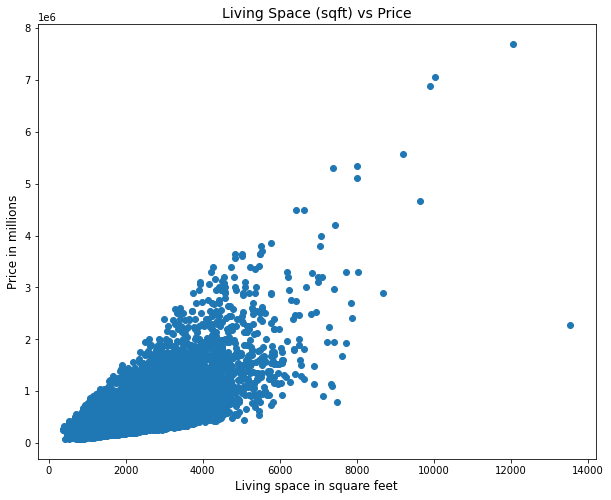

In [53]:
fig, ax = plt.subplots(figsize = (10,8))

ax.scatter(x = df['sqft_living'], y = df['price'])
font = {'color': 'black', 'size': 12 }

ax.set_title('Living Space (sqft) vs Price', fontdict={'size': 14})
ax.set_xlabel('Living space in square feet',fontdict=font)
ax.set_ylabel('Price in millions', fontdict=font)

plt.savefig('Living Space vs Price.png');

It can be noted that there is a linear relashionship between price and the size of the living space. As the size of living space increases, the price also increases. A buyer can be advised that the bigger the house they want, the more it will cost them.

## 3.1 Do home improvements increase the value of a house? By how much?

In [54]:
# aggregating the renovated column by price

renovated_price = df.groupby(['renovated'])['price'].mean().reset_index()
renovated_price

renovated          price
0          0  532135.147228
1          1  768901.892473

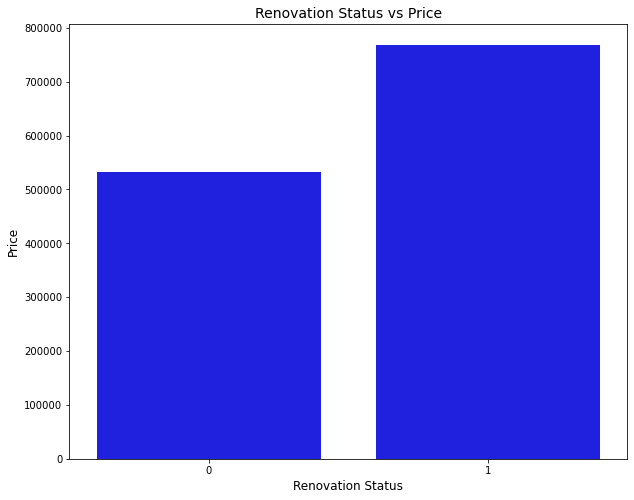

In [55]:
# plotting the data

fig, ax = plt.subplots(figsize = (10,8))

x = renovated_price["renovated"]
y = renovated_price['price']

#ax.bar(x = x, height = y)
sns.barplot(data = renovated_price, x= 'renovated', y = 'price', color = 'b')
font = {'color': 'black', 'size': 12 }

#add_value_label(x = house_df['renovated'], height = house_df['price'])
ax.set_title('Renovation Status vs Price', fontdict={'size': 14})
ax.set_xlabel('Renovation Status',fontdict=font)
ax.set_ylabel('Price', fontdict=font)

plt.savefig('Renovation Status vs Price.png');


From the plot above, it can be noted that renovated houses sell at a higher average price than those not renovated. The difference between those renovated and those not renovated is $236,761.57. It would therefore be recommended that sellers renovate their homes to fetch a higher price.

## 3.2 Does Location affect the house price?

In [56]:
# grouping the data

waterfront_price = df.groupby(['waterfront'])['price'].mean().reset_index()
waterfront_price

waterfront         price
0         0.0  5.322812e+05
1         1.0  1.717215e+06

In [57]:
zipcodes_price = df.groupby(['zipcode'])['price'].mean().reset_index()
zipcodes_price = zipcodes_price.sort_values(by = 'price', ascending = False ).head(10)
zipcodes_price

zipcode         price
24    98039  2.161300e+06
3     98004  1.356524e+06
25    98040  1.194874e+06
48    98112  1.096239e+06
41    98102  8.996077e+05
47    98109  8.800778e+05
43    98105  8.632289e+05
5     98006  8.599386e+05
53    98119  8.497148e+05
4     98005  8.102897e+05

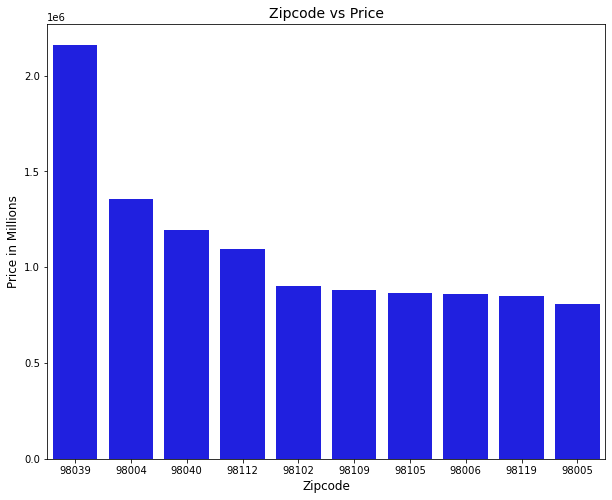

In [58]:
# plotting the data

fig, ax = plt.subplots(figsize = (10,8))


sns.barplot(data = zipcodes_price, 
            x = 'zipcode',
            y = 'price', 
            color = 'b', 
            dodge = False,
            order=zipcodes_price.sort_values('price',ascending = False).zipcode
           )

font = {'color': 'black', 'size': 12 }

ax.set_title('Zipcode vs Price', fontdict={'size': 14})
ax.set_xlabel('Zipcode',fontdict=font)
ax.set_ylabel('Price in Millions', fontdict=font)

plt.savefig('Zipcode vs Price.png');


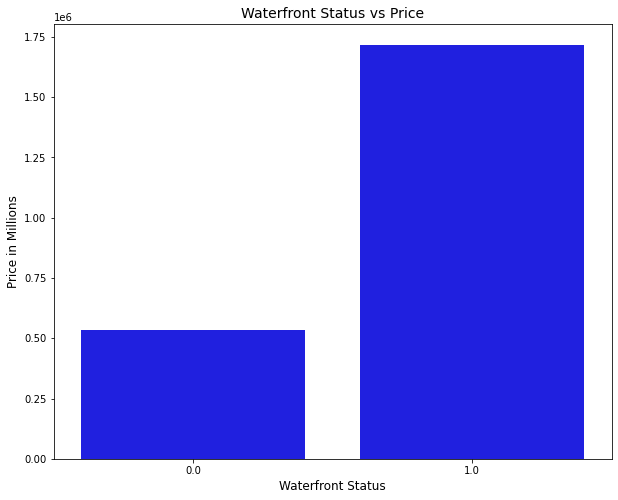

In [59]:
# plotting the data

fig, ax = plt.subplots(figsize = (10,8))

x = waterfront_price['waterfront']
y = waterfront_price['price']

#ax.bar(x = x, height = y)
sns.barplot(x = x,y = y, color = 'b')
font = {'color': 'black', 'size': 12 }

#add_value_label(x = house_df['renovated'], height = house_df['price'])
ax.set_title('Waterfront Status vs Price', fontdict={'size': 14})
ax.set_xlabel('Waterfront Status',fontdict=font)
ax.set_ylabel('Price in Millions', fontdict=font)

plt.savefig('Waterfront Status vs Price.png');


From plot, it can be obseved that waterfront properties fetch a higher price than those without a waterfront view. The price of waterfront properties is more than tripple those that are not waterfront properties. Also, it can be noted that some locations have really pricey houses compared to others.

## 3.3 Does condition and grade of a house affect the price?

In [60]:
building_condition = {
    1 : 'Poor to  Worn out',
    2 : 'Fair to Badly worn', 
    3 : 'Average to Some evidence of deferred maintenance and normal obsolescence with age', 
    4 : 'Good to  No obvious maintenance required but neither is everything new', 
    5 : 'Very Good to All items well maintained'
}

In [61]:
building_grade = {
    1 : 'Falls short of minimum building standards. Normally cabin or inferior structure',
    2 : 'Falls short of minimum building standards. Normally cabin or inferior structure',
    3 : 'Falls short of minimum building standards. Normally cabin or inferior structure',
    4 : 'Generally older, low quality construction. Does not meet code',
    5 : 'Low construction costs and workmanship. Small, simple design',
    6 : 'Lowest grade currently meeting building code. Low quality materials and simple designs',
    7 : 'Average grade of construction and design. Commonly seen in plats and older sub-divisions',
    8 : 'Just above average in construction and design. Usually better materials in both the exterior and interior finish work',
    9 : 'Better architectural design with extra interior and exterior design and quality',
    10 : 'Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage',
    11 : 'Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options',
    12 : 'Custom design and excellent builders. All materials are of the highest quality and all conveniences are present',
    13 : 'Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc'
}

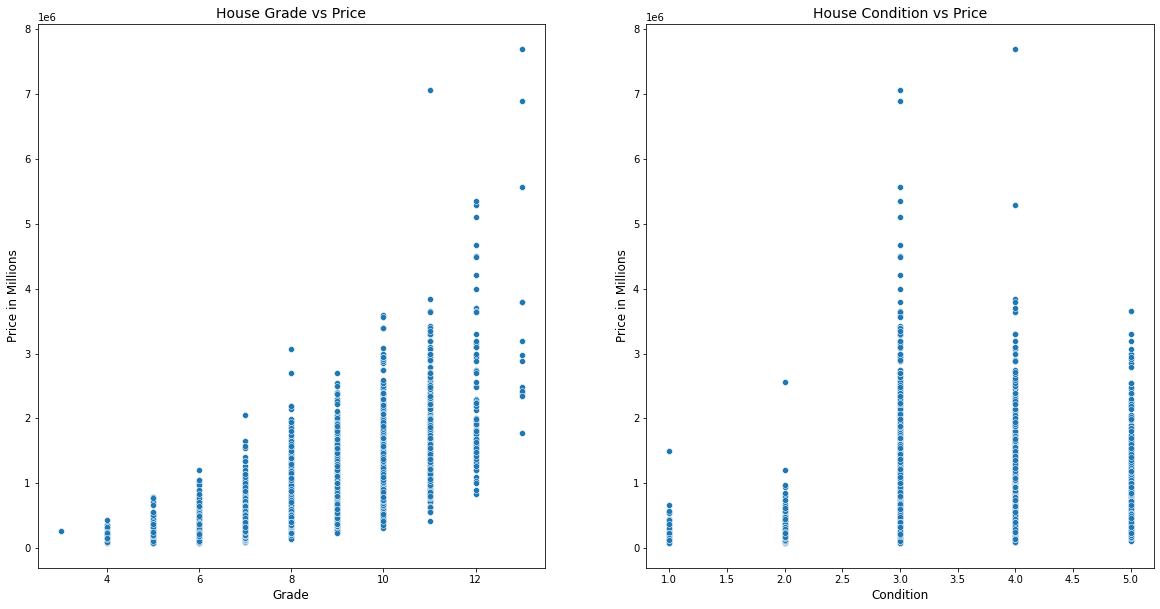

In [62]:
# plotting the data

fig, (ax, ax1) = plt.subplots(ncols = 2, figsize = (20,10))

sns.scatterplot(data = df,
               x = 'grade',
               y = 'price',
               x_bins = 13,
               palette="deep",
               ax = ax
               )

sns.scatterplot(data = df,
               x = 'condition',
               y = 'price',
               x_bins = 13,
               palette="deep",
               ax = ax1
               )

font = {'color': 'black', 'size': 12 }

ax.set_title('House Grade vs Price', fontdict={'size': 14})
ax.set_xlabel('Grade',fontdict=font)
ax.set_ylabel('Price in Millions', fontdict=font)

ax1.set_title('House Condition vs Price', fontdict={'size': 14})
ax1.set_xlabel('Condition',fontdict=font)
ax1.set_ylabel('Price in Millions', fontdict=font)

plt.savefig('House Condition & Grade vs Price.png');

It can be noted that both condition and grade of a house affects the price. It can be noted that a house awarded with a higher grade by the county attracts a higher price, same to condition. It can also be noted that most houses have a 3 in condition,  meaning that the house condition is average. It would be wise to advice a seller to improve the condition of the house, and get a high grade for the house, so as to maximize on the price offer they receive on the house.

## 3.4 Does the number of bedrooms and bathrooms affect the price of a house?

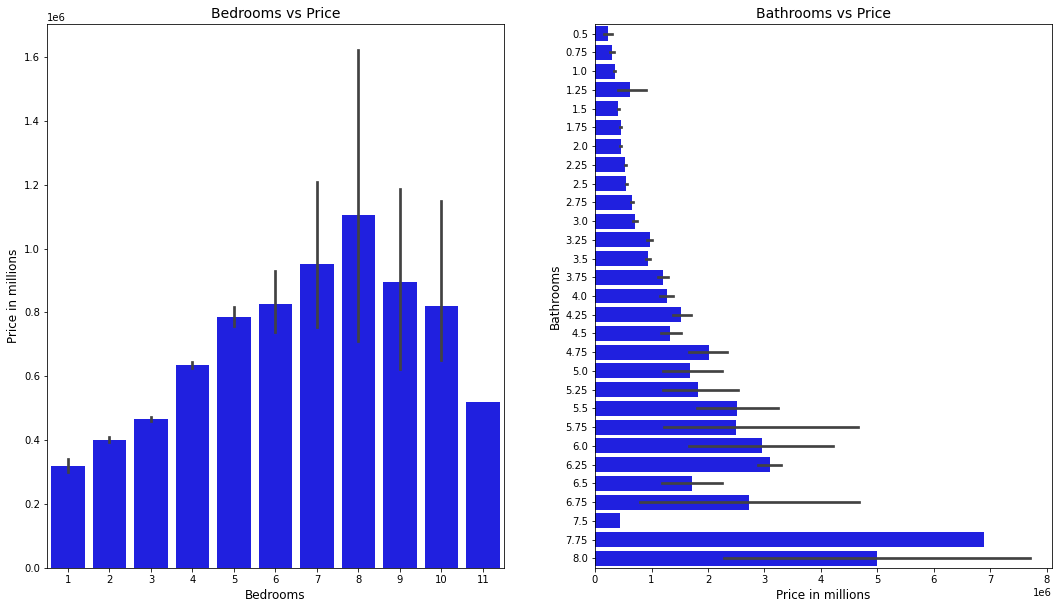

In [63]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (18,10))

#ax1.bar(x = df['bedrooms'], height = df['price'])
#ax2.bar(x = df['bathrooms'], height = df['price'], bins = 10)
sns.barplot(data = df, x = 'bedrooms', y = 'price', color = 'b', ax = ax1)
sns.barplot(data = df, y = 'bathrooms', x = 'price', color = 'b', ax = ax2, orient = 'h')
font = {'color': 'black', 'size': 12 }

ax1.set_title('Bedrooms vs Price', fontdict={'size': 14})
ax1.set_xlabel('Bedrooms',fontdict=font)
ax1.set_ylabel('Price in millions', fontdict=font)

ax2.set_title('Bathrooms vs Price', fontdict={'size': 14})
ax2.set_xlabel('Price in millions',fontdict=font)
ax2.set_ylabel('Bathrooms', fontdict=font)

plt.savefig('Bedrooms & Bathrooms vs Price.png');

It can be noted that as the number of bedrooms and bathrooms increase, the price also increases. A buyer can be advised that the number of bedrooms and bathrooms they choose to have affects the price, with the more they choose, the higher the price gets.

# 4. Modelling

LinearRegression fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

There are four assumptions that must be checked as part of the multiple linear regression analysis process:

- No multicollinearity
- Linear relationship between explanatory and response variables
- Homoscedasticity of error terms
- Normal distribution of model residuals

Checking for multicollinearity and linearity can be checked before the modelling, while normality and homoscedasticity canbe done after the modelling, once the residuals are acquired.

## 4.1 Assumptions - A

### 4.1.1 Multicollinearity

In regression analysis the main goal is to identify the relationship between each predictor and the outcome variable. The interpretation of a regression coefficient is that it represents the average change in the dependent variable for each 1 unit change in a predictor, assuming that all the other predictor variables are kept constant. Correlation is a problem, because it indicates that changes in one predictor are associated with changes in another one as well.

To investigate how the different parameters correlate with each other, and with price, this can be done by plotting scatter plots of the variables against each other, or by creating a correlation matrix. In this case, since there are many variables, the scatter plot would be messy and hard to read, hence, correlation matrix is used.

In [64]:
# calculating the correlation

correlation = df.corr()
correlation

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.315961   0.525915     0.701929  0.089879  0.256820   
bedrooms       0.315961  1.000000   0.527870     0.593178  0.033602  0.183707   
bathrooms      0.525915  0.527870   1.000000     0.755755  0.088368  0.502574   
sqft_living    0.701929  0.593178   0.755755     1.000000  0.173449  0.353941   
sqft_lot       0.089879  0.033602   0.088368     0.173449  1.000000 -0.004824   
floors         0.256820  0.183707   0.502574     0.353941 -0.004824  1.000000   
waterfront     0.264308 -0.002054   0.063628     0.104635  0.021458  0.020794   
condition      0.036031  0.023440  -0.126443    -0.059397 -0.008806 -0.264013   
grade          0.667964  0.366174   0.665834     0.762776  0.114726  0.458783   
sqft_above     0.605392  0.492543   0.686664     0.876448  0.184134  0.523970   
zipcode       -0.053409 -0.158588  -0.204778    -0.199793 -0.129582 -0.059522   
lat            0.306687 -0.011595   0.024301     0.052178 -0.085507  0.049280   
long           0.022047  0.136561   0.224889     0.241200  0.230222  0.125912   
sqft_living15  0.585267  0.404532   0.569878     0.756400  0.144756  0.280072   
sqft_lot15     0.082849  0.031892   0.088297     0.184337  0.718203 -0.010734   
renovated      0.117546  0.018354   0.046738     0.050825  0.005089  0.003705   
age_category  -0.037320 -0.154537  -0.454074    -0.288334 -0.061642 -0.417128   
viewed         0.356249  0.081678   0.175879     0.268460  0.068213  0.016297   
basement       0.178255  0.160391   0.159897     0.201236 -0.034877 -0.252426   

               waterfront  condition     grade  sqft_above   zipcode  \
price            0.264308   0.036031  0.667964    0.605392 -0.053409   
bedrooms        -0.002054   0.023440  0.366174    0.492543 -0.158588   
bathrooms        0.063628  -0.126443  0.665834    0.686664 -0.204778   
sqft_living      0.104635  -0.059397  0.762776    0.876448 -0.199793   
sqft_lot         0.021458  -0.008806  0.114726    0.184134 -0.129582   
floors           0.020794  -0.264013  0.458783    0.523970 -0.059522   
waterfront       1.000000   0.016659  0.082817    0.071776  0.028925   
condition        0.016659   1.000000 -0.146854   -0.158826  0.002835   
grade            0.082817  -0.146854  1.000000    0.756069 -0.185761   
sqft_above       0.071776  -0.158826  0.756069    1.000000 -0.261557   
zipcode          0.028925   0.002835 -0.185761   -0.261557  1.000000   
lat             -0.012154  -0.015209  0.113602   -0.001160  0.266729   
long            -0.037632  -0.105800  0.200324    0.344819 -0.564253   
sqft_living15    0.083822  -0.092979  0.713863    0.731756 -0.279286   
sqft_lot15       0.030657  -0.003093  0.120974    0.195069 -0.147288   
renovated        0.074267  -0.055369  0.015254    0.020558  0.062383   
age_category     0.015383   0.319919 -0.401466   -0.379039  0.325637   
viewed           0.248683   0.046879  0.235245    0.151899  0.091373   
basement         0.039227   0.130422  0.050736   -0.207227  0.159578   

                    lat      long  sqft_living15  sqft_lot15  renovated  \
price          0.306687  0.022047       0.585267    0.082849   0.117546   
bedrooms      -0.011595  0.136561       0.404532    0.031892   0.018354   
bathrooms      0.024301  0.224889       0.569878    0.088297   0.046738   
sqft_living    0.052178  0.241200       0.756400    0.184337   0.050825   
sqft_lot      -0.085507  0.230222       0.144756    0.718203   0.005089   
floors         0.049280  0.125912       0.280072   -0.010734   0.003705   
waterfront    -0.012154 -0.037632       0.083822    0.030657   0.074267   
condition     -0.015209 -0.105800      -0.092979   -0.003093  -0.055369   
grade          0.113602  0.200324       0.713863    0.120974   0.015254   
sqft_above    -0.001160  0.344819       0.731756    0.195069   0.020558   
zipcode        0.266729 -0.564253      -0.279286   -0.147288   0.062383   
lat            1.000000 -0.135340       0.048721   -0.08

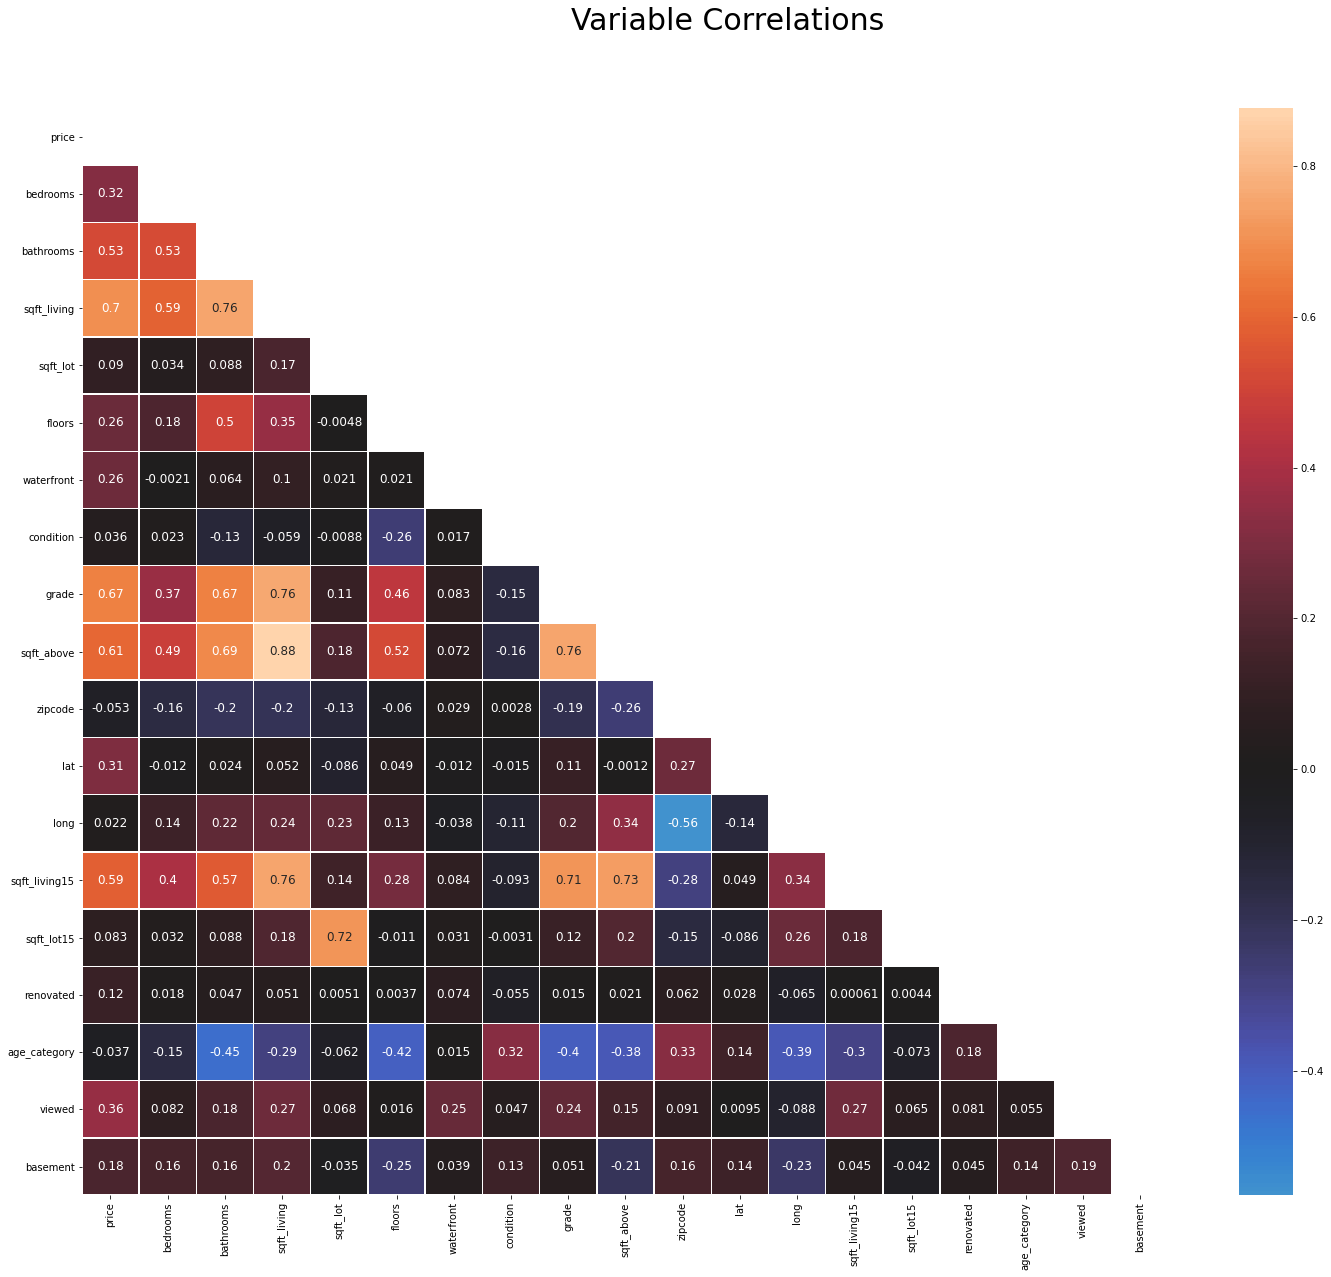

In [65]:
# plotting the correlation

mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize= (25,20))

sns.heatmap(
    data = correlation,
    mask = mask,
    square = True,
    annot = True,
    center = 0,
    linewidths = 0.5,
    annot_kws={"size": 12}
)

fig.suptitle('Variable Correlations', fontsize=30, y=.95)

plt.savefig('Correlation Matrix.png');

In [66]:
# checking correlation of variables with price

correlation['price']

price            1.000000
bedrooms         0.315961
bathrooms        0.525915
sqft_living      0.701929
sqft_lot         0.089879
floors           0.256820
waterfront       0.264308
condition        0.036031
grade            0.667964
sqft_above       0.605392
zipcode         -0.053409
lat              0.306687
long             0.022047
sqft_living15    0.585267
sqft_lot15       0.082849
renovated        0.117546
age_category    -0.037320
viewed           0.356249
basement         0.178255
Name: price, dtype: float64

It can be noted that 'sqft_living', 'grade', 'sqft_above' and 'sqft_living15' have the highest correlation with price, with 'sqft_living' having the highest correlation.

For one to create a good model, multicollinearity between variables should be avoided. Generally, correlation between 0.7 and 0.8 is considered high, also those greater than 0.8. The absolute value of the correlations is used because only the strength, not the direction, of a linear relationship matters.
The features that highly correlated to each other should be identified and dealt with.

In [67]:
# saving the absolute value of correlation to a dataframe

df_corr = abs(df.corr()).stack().reset_index().sort_values(0, ascending=False)

# creating a new column for the pairs

df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

# setting the pairs to be the index

df_corr.set_index(['pairs'], inplace = True)

# dropping the level columns since they are redundant

df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# renaming the correlation column

df_corr.columns = ['Coefficients']

# dropping the duplicates

df_corr.drop_duplicates(inplace=True)

# previewing the dataframe
df_corr

Coefficients
pairs                                     
(price, price)                    1.000000
(sqft_living, sqft_above)         0.876448
(sqft_living, grade)              0.762776
(sqft_living, sqft_living15)      0.756400
(grade, sqft_above)               0.756069
...                                    ...
(condition, sqft_lot15)           0.003093
(condition, zipcode)              0.002835
(bedrooms, waterfront)            0.002054
(sqft_above, lat)                 0.001160
(renovated, sqft_living15)        0.000614

[172 rows x 1 columns]

To identify the highly correlated columns, the data can be subsetted. A threshold of the correlation can be set at 0.70, since high correlation runs from 0.7 to 1. This will identify all the pairs that correlate with each other at a coefficient greater than 0.7

In [68]:
# subsetting the data

df_corr[(df_corr.Coefficients>.70) & (df_corr.Coefficients<1)]

Coefficients
pairs                                     
(sqft_living, sqft_above)         0.876448
(sqft_living, grade)              0.762776
(sqft_living, sqft_living15)      0.756400
(grade, sqft_above)               0.756069
(sqft_living, bathrooms)          0.755755
(sqft_living15, sqft_above)       0.731756
(sqft_lot, sqft_lot15)            0.718203
(grade, sqft_living15)            0.713863
(price, sqft_living)              0.701929

The above pairs shows the combination of variables with high correlations. To fix the issue of multicollinearity issue, a variable can be dropped from each pair.

- 'sqft_living' is essential in the analysis since the size of the house matters to buyers, so 'sqft_above' can be dropped.
- 'grade' can be dropped since 'condition' provides a similar sentiment.
- 'sqft_living15' can be dropped since neighbors houses size is not as important in the analysis. Since 'sqft_lot15' also communicates similar information, it can also be dropped.
- 'bathrooms' can be dropped since 'sqft_living' is being retained.


In [69]:
# dropping columns

df.drop(labels = ['sqft_above', 'grade', 'sqft_living15', 'sqft_lot15', 'bathrooms'], 
        axis = 1,
        inplace = True
       )

In [70]:
df.head(2)

price  bedrooms  sqft_living  sqft_lot  floors  waterfront  condition  \
0  221900.0         3         1180      5650     1.0         0.0          3   
1  538000.0         3         2570      7242     2.0         0.0          3   

   zipcode      lat     long  renovated  age_category  viewed  basement  
0    98178  47.5112 -122.257          0             3       0         0  
1    98125  47.7210 -122.319          1             4       0         1

### 4.1.2 Linearity

This assumes there is a linear relationship between the dependent and independent variables.

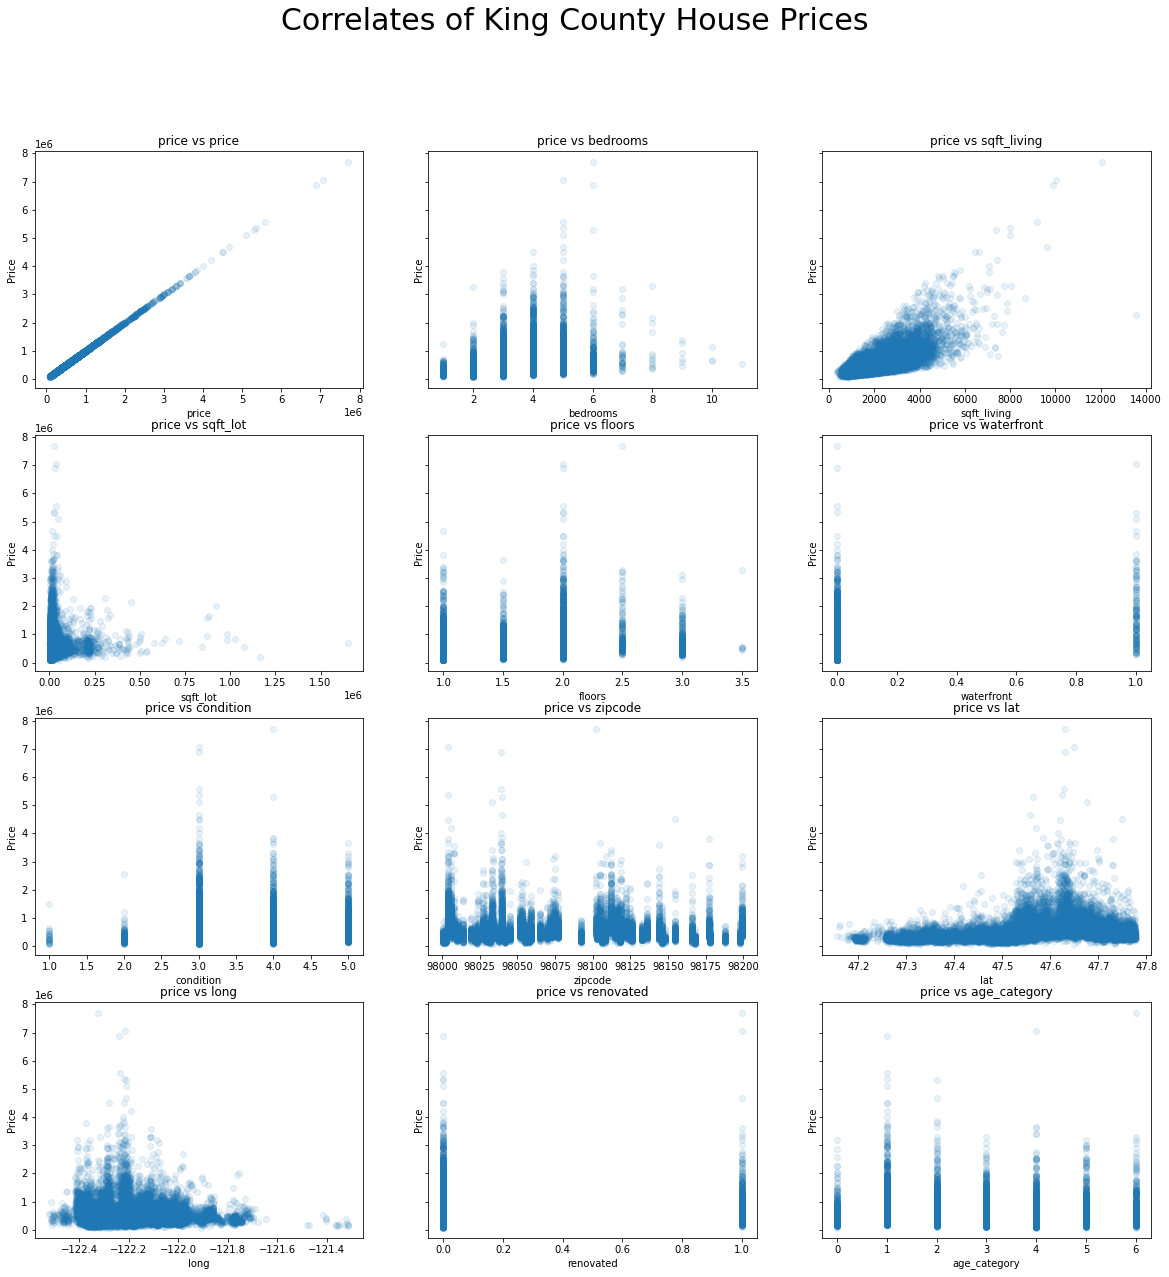

In [71]:
# plotting of disribution

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20), sharey=True)

fig.suptitle('Correlates of King County House Prices', fontsize=30)

for ax, column in zip(axes.flatten(),df.columns):
    ax.scatter(df[column], df['price'] , label=column, alpha=.1)
    ax.set_title(f'price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Price');

It can be noted that 'bedrooms', 'floors', 'waterfront', 'condition', 'zipcode', 'renovated', 'age_category' don't have a claer linear relationship with house price.

In [72]:
df.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'condition', 'zipcode', 'lat', 'long', 'renovated', 'age_category',
       'viewed', 'basement'],
      dtype='object')

## 4.2 Modelling Pre-processing

The latitude and longitude columns can be dropped, since they show location, and zipcode is already doing that.

In [73]:
df.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'condition', 'zipcode', 'lat', 'long', 'renovated', 'age_category',
       'viewed', 'basement'],
      dtype='object')

In [74]:
# dropping columns

df.drop(labels = ['lat', 'long'], 
        axis = 1,
        inplace = True
       )

In a normal distribution,  99% or all data falls within a z score of under 3, hence, all values with a z-score above that can be treated as outliers.

In [75]:
# calculating the z score of the data

z = stats.zscore(df)
z

array([[-0.86668512, -0.41127207, -0.98065832, ...,  0.27162471,
        -0.32923644, -0.79133104],
       [-0.00623887, -0.41127207,  0.53333669, ...,  0.92609388,
        -0.32923644,  1.26369363],
       [-0.98073984, -1.51735322, -1.42723238, ...,  1.58056306,
        -0.32923644, -0.79133104],
       ...,
       [-0.37616542, -1.51735322, -1.15493112, ..., -1.03731364,
        -0.32923644, -0.79133104],
       [-0.38188449, -0.41127207, -0.5231922 , ..., -1.03731364,
        -0.32923644, -0.79133104],
       [-0.58603973, -1.51735322, -1.15493112, ..., -1.03731364,
        -0.32923644, -0.79133104]])

In [76]:
# getting the data without outliers

df = df[(z < 3).all(axis = 1)]

In [77]:
df

price  bedrooms  sqft_living  sqft_lot  floors  waterfront  \
0      221900.0         3         1180      5650     1.0         0.0   
2      180000.0         2          770     10000     1.0         0.0   
3      604000.0         4         1960      5000     1.0         0.0   
4      510000.0         3         1680      8080     1.0         0.0   
6      257500.0         3         1715      6819     2.0         0.0   
...         ...       ...          ...       ...     ...         ...   
21592  360000.0         3         1530      1131     3.0         0.0   
21593  400000.0         4         2310      5813     2.0         0.0   
21594  402101.0         2         1020      1350     2.0         0.0   
21595  400000.0         3         1600      2388     2.0         0.0   
21596  325000.0         2         1020      1076     2.0         0.0   

       condition  zipcode  renovated  age_category  viewed  basement  
0              3    98178          0             3       0         0  
2              3    98028          0             5       0         0  
3              5    98136          0             3       0         1  
4              3    98074          0             2       0         0  
6              3    98003          0             1       0         0  
...          ...      ...        ...           ...     ...       ...  
21592          3    98103          0             1       0         0  
21593          3    98146          0             1       0         0  
21594          3    98144          0             1       0         0  
21595          3    98027          0             1       0         0  
21596          3    98144          0             1       0         0  

[18394 rows x 12 columns]

In [78]:
# separating the data into independent and dependent variables respectively

X = df.drop(labels = 'price', axis = 1)
y = df['price']

Before modelling, the data needs to be split into training and test data. The training data will be used to train the model, while the test data will be used to test the model to evaluate it's performance. A ratio of 70-30 was used for splitting, with 70% of the data being used for training. A random state instance was used to ensure reproducibility of results.
For this model, sklearn will be mainly used, but also statsmodels will be used.

In [79]:
# splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.30, 
                                                    random_state = 25
                                                   )

The variables are categorized into continuous features and categorical features. This enables easier preprocessing such as one hot encoding categorical variables, and carrying out log transformation and scaling on continuous variables.

In [80]:
# categorizing variables

categoricals = ['waterfront', 'condition', 'renovated', 'basement', 'viewed','zipcode','floors', 'age_category']
numericals = [ 'sqft_living', 'sqft_lot' , 'bedrooms']

Sklearn's Linear Regression model runs on fully numeric variables. So all the dependent variables need to be converted to a numeric nature.

### 4.2.1 Training Data 

In [81]:
# converting the categorical variables to a categoric data type

category_type = X_train[categoricals].astype('category')

In [82]:
# carrying out one hot encoding

X_train_dummies = pd.get_dummies(category_type, prefix= category_type.columns, drop_first=True)

X_train_categoricals_processed = X_train.drop(categoricals, axis=1)

X_train_categoricals_processed = X_train_categoricals_processed.join(other = X_train_dummies)
X_train_categoricals_processed

bedrooms  sqft_living  sqft_lot  condition_2  condition_3  condition_4  \
3725          4         3080      4945            0            1            0   
21541         3         1410      1250            0            1            0   
9541          3         1940      8196            0            1            0   
17998         4         2940      5763            0            0            0   
10147         4         2860     15054            0            1            0   
...         ...          ...       ...          ...          ...          ...   
8648          3         1770      9000            0            1            0   
1361          3         3940     10360            0            1            0   
1378          3         1860      8060            0            0            1   
3469          3         1380      4500            0            1            0   
7830          4         2270     18450            0            1            0   

       condition_5  basement_1  zipcode_98002  zipcode_98003  ...  floors_1.5  \
3725             0           1              0              0  ...           0   
21541            0           1              0              0  ...           0   
9541             0           0              0              0  ...           0   
17998            1           1              0              0  ...           0   
10147            0           1              0              0  ...           0   
...            ...         ...            ...            ...  ...         ...   
8648             0           1              0              0  ...           0   
1361             0           1              0              0  ...           0   
1378             0           0              0              0  ...           0   
3469             0           0              0              0  ...           0   
7830             0           0              0              0  ...           0   

       floors_2.0  floors_2.5  floors_3.0  age_category_1  age_category_2  \
3725            1           0           0               1               0   
21541           1           0           0               1               0   
9541            1           0           0               0               1   
17998           0           0           0               0               0   
10147           0           0           0               0               0   
...           ...         ...         ...             ...             ...   
8648            0           0           0               0               0   
1361            1           0           0               0               1   
1378            1           0           0               0               1   
3469            0           0           0               1               0   
7830            0           0           0               0               0   

       age_category_3  age_category_4  age_category_5  age_category_6  
3725                0               0               0               0  
21541               0               0               0               0  
9541                0               0               0               0  
17998               1               0               0               0  
10147               1               0               0               0  
...               ...             ...             ...             ...  
8648                0               0               0               0  
1361                0               0               0               0  
1378                0               0               0               0  
3469                0               0               0               0  
7830                1               0               0               0  

[12875 rows x 87 columns]

For continuous variables, they need to undergo 2 transformations. One, for the variables that don't have a normal-like distribution, they need to be log transformed, so they can be more normal like. For variables that have very large magnitudes, they need to be scaled down, so they can have a similar magnitude. These are the transormations to be carried out.

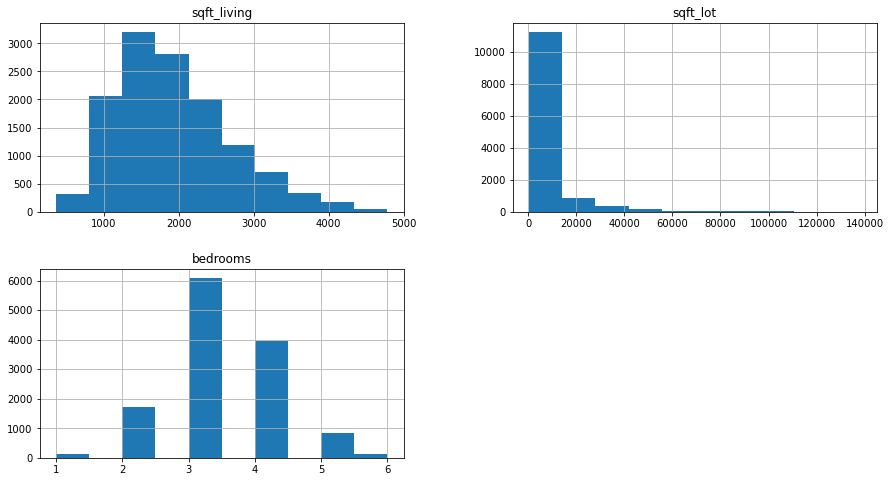

In [83]:
X_train[numericals].hist(figsize = (15,8));

From the histograms of the continuous variables, it can be noted that the plots are skewed, and not having a normal-like distribution. Having the data more normally distributed will benefit the model and model performance in general. This can be be fixed by applying a log transformation on the data. This will help reduce skewness and variability of the data.

It can also be noted that the data has really big magnitudes. To help with this, feature scaling can be done, which will manage the difference in magnitude. Min-Max Scaling will be used. This is because min-max scaling results in small standard deviations, which can suppress outliers, which are prevalent in this data.
This can be calculated by :
$$x' = \dfrac{x - \min(x)}{\max(x)-\min(x)}$$

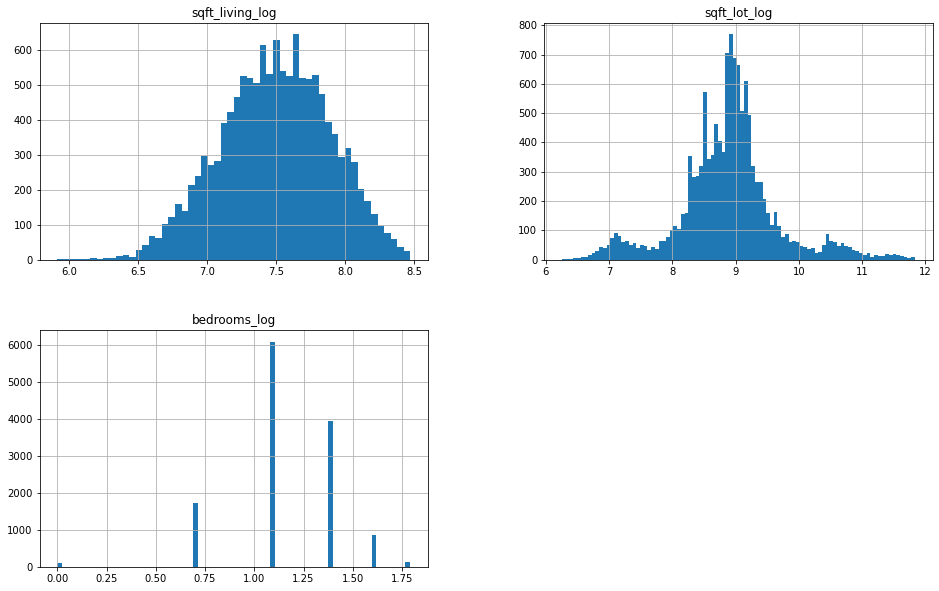

In [84]:
# log transforming the continuous data

log_names = [f'{column}_log' for column in X_train[numericals].columns]

X_train_numeric_log = np.log(X_train[numericals])
X_train_numeric_log.columns = log_names
X_train_numeric_log.hist(figsize=(16, 10), bins='auto');

In [85]:
# dropping the existing columns of continuous data

X_train.drop(numericals, axis = 1)

floors  waterfront  condition  zipcode  renovated  age_category  \
3725      2.0         0.0          3    98126          0             1   
21541     2.0         0.0          3    98119          0             1   
9541      2.0         0.0          3    98052          0             2   
17998     1.0         0.0          5    98108          0             3   
10147     1.0         0.0          3    98155          0             3   
...       ...         ...        ...      ...        ...           ...   
8648      1.0         0.0          3    98168          0             0   
1361      2.0         0.0          3    98052          0             2   
1378      2.0         0.0          4    98029          0             2   
3469      1.0         0.0          3    98038          0             1   
7830      1.0         0.0          3    98001          0             3   

       viewed  basement  
3725        0         1  
21541       0         1  
9541        0         0  
17998       0         1  
10147       0         1  
...       ...       ...  
8648        0         1  
1361        0         1  
1378        0         0  
3469        0         0  
7830        0         0  

[12875 rows x 8 columns]

In [86]:
 # defining a function
    
def min_max_scaling_calculation(feature):
    """
    Performs min-max scaling on the input series.
    Input: series
    Output : scaled series
    """
    scaled = (feature - min(feature)) / (max(feature) - min(feature))
    
    return scaled

In [87]:
# carring out min-max scaling

X_train_numeric_log.apply(min_max_scaling_calculation)

sqft_living_log  sqft_lot_log  bedrooms_log
3725          0.828228      0.403509      0.773706
21541         0.522862      0.157130      0.613147
9541          0.647573      0.494030      0.613147
17998         0.810047      0.430934      0.773706
10147         0.799265      0.602955      0.773706
...                ...           ...           ...
8648          0.611731      0.510795      0.613147
1361          0.924469      0.536006      0.613147
1378          0.631115      0.491032      0.613147
3469          0.514456      0.386615      0.613147
7830          0.708968      0.639398      0.773706

[12875 rows x 3 columns]

In [88]:
# combining the dataframes

X_train_final = X_train_numeric_log.join(X_train_categoricals_processed)
X_train_final.drop(numericals, axis = 1, inplace = True)
X_train_final

sqft_living_log  sqft_lot_log  bedrooms_log  condition_2  condition_3  \
3725          8.032685      8.506132      1.386294            0            1   
21541         7.251345      7.130899      1.098612            0            1   
9541          7.570443      9.011402      1.098612            0            1   
17998         7.986165      8.659213      1.386294            0            0   
10147         7.958577      9.619399      1.386294            0            1   
...                ...           ...           ...          ...          ...   
8648          7.478735      9.104980      1.098612            0            1   
1361          8.278936      9.245708      1.098612            0            1   
1378          7.528332      8.994669      1.098612            0            0   
3469          7.229839      8.411833      1.098612            0            1   
7830          7.727535      9.822820      1.386294            0            1   

       condition_4  condition_5  basement_1  zipcode_98002  zipcode_98003  \
3725             0            0           1              0              0   
21541            0            0           1              0              0   
9541             0            0           0              0              0   
17998            0            1           1              0              0   
10147            0            0           1              0              0   
...            ...          ...         ...            ...            ...   
8648             0            0           1              0              0   
1361             0            0           1              0              0   
1378             1            0           0              0              0   
3469             0            0           0              0              0   
7830             0            0           0              0              0   

       ...  floors_1.5  floors_2.0  floors_2.5  floors_3.0  age_category_1  \
3725   ...           0           1           0           0               1   
21541  ...           0           1           0           0               1   
9541   ...           0           1           0           0               0   
17998  ...           0           0           0           0               0   
10147  ...           0           0           0           0               0   
...    ...         ...         ...         ...         ...             ...   
8648   ...           0           0           0           0               0   
1361   ...           0           1           0           0               0   
1378   ...           0           1           0           0               0   
3469   ...           0           0           0           0               1   
7830   ...           0           0           0           0               0   

       age_category_2  age_category_3  age_category_4  age_category_5  \
3725                0               0               0               0   
21541               0               0               0               0   
9541                1               0               0               0   
17998               0               1               0               0   
10147               0               1               0               0   
...               ...             ...             ...             ...   
8648                0               0               0               0   
1361                1               0               0               0   
1378                1               0               0               0   
3469                0               0               0               0   
7830                0               1               0               0   

       age_category_6  
3725                0  
21541               0  
9541                0  
17998               0  
10147               0  
...               ...  
8648                0  
1361                0  
1378                0  
3469                0  
7830                0  

[12875 rows x 87 c

In [89]:
price_X_train = X_train_final.join(y_train)
#pd.concat([y_train, X_train_final], axis = 1)

In [90]:
price_X_train

sqft_living_log  sqft_lot_log  bedrooms_log  condition_2  condition_3  \
3725          8.032685      8.506132      1.386294            0            1   
21541         7.251345      7.130899      1.098612            0            1   
9541          7.570443      9.011402      1.098612            0            1   
17998         7.986165      8.659213      1.386294            0            0   
10147         7.958577      9.619399      1.386294            0            1   
...                ...           ...           ...          ...          ...   
8648          7.478735      9.104980      1.098612            0            1   
1361          8.278936      9.245708      1.098612            0            1   
1378          7.528332      8.994669      1.098612            0            0   
3469          7.229839      8.411833      1.098612            0            1   
7830          7.727535      9.822820      1.386294            0            1   

       condition_4  condition_5  basement_1  zipcode_98002  zipcode_98003  \
3725             0            0           1              0              0   
21541            0            0           1              0              0   
9541             0            0           0              0              0   
17998            0            1           1              0              0   
10147            0            0           1              0              0   
...            ...          ...         ...            ...            ...   
8648             0            0           1              0              0   
1361             0            0           1              0              0   
1378             1            0           0              0              0   
3469             0            0           0              0              0   
7830             0            0           0              0              0   

       ...  floors_2.0  floors_2.5  floors_3.0  age_category_1  \
3725   ...           1           0           0               1   
21541  ...           1           0           0               1   
9541   ...           1           0           0               0   
17998  ...           0           0           0               0   
10147  ...           0           0           0               0   
...    ...         ...         ...         ...             ...   
8648   ...           0           0           0               0   
1361   ...           1           0           0               0   
1378   ...           1           0           0               0   
3469   ...           0           0           0               1   
7830   ...           0           0           0               0   

       age_category_2  age_category_3  age_category_4  age_category_5  \
3725                0               0               0               0   
21541               0               0               0               0   
9541                1               0               0               0   
17998               0               1               0               0   
10147               0               1               0               0   
...               ...             ...             ...             ...   
8648                0               0               0               0   
1361                1               0               0               0   
1378                1               0               0               0   
3469                0               0               0               0   
7830                0               1               0               0   

       age_category_6     price  
3725                0  866500.0  
21541               0  530000.0  
9541                0  661000.0  
17998               0  640000.0  
10147               0  460000.0  
...               ...       ...  
8648                0  286000.0  
1361                0  933399.0  
1378                0  505000.0  
3469                0  275000.0  
7830                0  375000.0  

[12875 rows x 88 columns]

In [91]:
price_log = np.log(y_train)

### 4.2.2 Testing Data 

The pre-processing is the same as that of training data.

sqft_living_log  sqft_lot_log  bedrooms_log  condition_2  condition_3  \
8582          7.859413      9.045819      1.386294            0            1   
7987          7.749322      8.451694      1.386294            0            1   
10425         7.081709      8.938532      1.386294            0            1   
604           7.279319      8.474077      1.098612            0            1   
4300          7.251345      9.017968      1.098612            0            1   
...                ...           ...           ...          ...          ...   
13590         7.420579      8.517193      1.098612            0            0   
12699         7.544332      8.883224      1.386294            0            1   
7891          7.064759      8.898366      1.098612            0            1   
3438          7.843849      8.897272      1.386294            0            1   
21156         7.882315      8.836955      1.386294            0            1   

       condition_4  condition_5  basement_1  zipcode_98002  zipcode_98003  \
8582             0            0           0              0              0   
7987             0            0           0              0              0   
10425            0            0           0              0              0   
604              0            0           0              0              0   
4300             0            0           0              0              0   
...            ...          ...         ...            ...            ...   
13590            1            0           0              0              0   
12699            0            0           0              0              0   
7891             0            0           0              0              0   
3438             0            0           0              0              0   
21156            0            0           0              0              0   

       ...  floors_1.5  floors_2.0  floors_2.5  floors_3.0  age_category_1  \
8582   ...           0           1           0           0               0   
7987   ...           0           1           0           0               1   
10425  ...           1           0           0           0               0   
604    ...           0           1           0           0               0   
4300   ...           0           0           0           0               0   
...    ...         ...         ...         ...         ...             ...   
13590  ...           1           0           0           0               0   
12699  ...           0           0           0           0               0   
7891   ...           0           0           0           0               0   
3438   ...           0           1           0           0               0   
21156  ...           0           1           0           0               1   

       age_category_2  age_category_3  age_category_4  age_category_5  \
8582                1               0               0               0   
7987                0               0               0               0   
10425               0               0               0               1   
604                 1               0               0               0   
4300                0               0               0               0   
...               ...             ...             ...             ...   
13590               0               0               0               0   
12699               0               1               0               0   
7891                0               1               0               0   
3438                1               0               0               0   
21156               0               0               0               0   

       age_category_6  
8582                0  
7987                0  
10425               0  
604                 0  
4300                0  
...               ...  
13590               1  
12699               0  
7891                0  
3438                0  
21156               0  

[5519 rows x 87 co

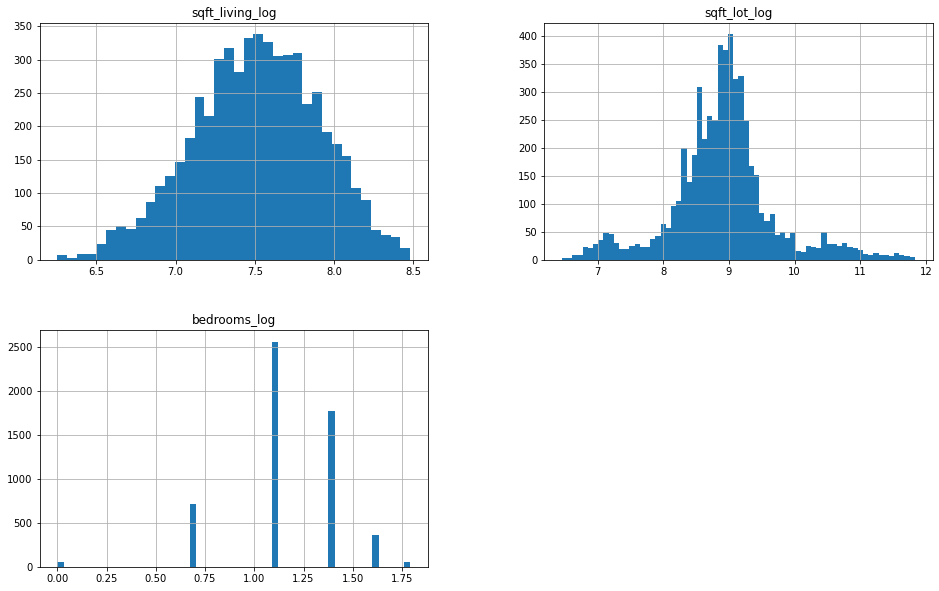

In [92]:
# converting the categorical columns to the right data type

category_type2 = X_test[categoricals].astype('category')

# carrying out one hot encoding

X_test_dummies = pd.get_dummies(category_type2, prefix= category_type2.columns, drop_first=True)

X_test_categoricals_processed = X_test.drop(categoricals, axis=1)

X_test_categoricals_processed = X_test_categoricals_processed.join(other = X_test_dummies)

# carrying out log transformation

log_names = [f'{column}_log' for column in X_test[numericals].columns]

X_test_numeric_log = np.log(X_test[numericals])
X_test_numeric_log.columns = log_names
X_test_numeric_log.hist(figsize=(16, 10), bins='auto');

# dropping the original numerical columns from the dataframe

X_test.drop(numericals, axis = 1)

# carrying out min- max csaling on the data

X_test_numeric_log.apply(min_max_scaling_calculation)

# combining the dataframe

X_test_final = X_test_numeric_log.join(X_test_categoricals_processed)
X_test_final.drop(numericals, axis = 1, inplace = True)
X_test_final

## 4.3  Modelling

### 4.3.1 Baseline Model

Statsmodels will be used to carry out the linear regression. For the baseline, which is a simple model, price will be evaluated against the factor that highly correlates with it.

In [93]:
bs = sm.OLS(y_train, sm.add_constant(X_train_final[['sqft_living_log']])).fit()
bs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     7178.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        05:12:34   Log-Likelihood:            -1.7439e+05
No. Observations:               12875   AIC:                         3.488e+05
Df Residuals:                   12873   BIC:                         3.488e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.141e+06   3.09e+04    -69.291      0.000    -2.2e+06   -2.08e+06
sqft_living_log  3.487e+05   4115.589     84.720      0.000    3.41e+05    3.57e+05
==============================================================================
Omnibus:                     2519.580   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5919.120
Skew:                           1.104   Prob(JB):                         0.00
Kurtosis:                       5.481   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model accounts for 35.8% of the variance in the target with the sqft living feature. This is really low.

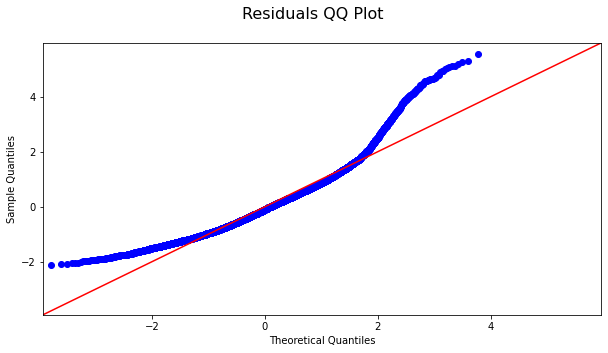

In [94]:
fig = sm.graphics.qqplot(bs.resid, dist=stats.norm, line='45', fit=True)

fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)

As the second model, the numeric variables will be added for evaluation.

In [95]:
m1 = sm.OLS(y_train, sm.add_constant(X_train_final[['sqft_living_log', 'sqft_lot_log', 'bedrooms_log']])).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     2593.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        05:12:34   Log-Likelihood:            -1.7420e+05
No. Observations:               12875   AIC:                         3.484e+05
Df Residuals:                   12871   BIC:                         3.484e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.271e+06   3.67e+04    -61.907      0.000   -2.34e+06    -2.2e+06
sqft_living_log  4.156e+05   5501.937     75.545      0.000    4.05e+05    4.26e+05
sqft_lot_log    -2.725e+04   2122.238    -12.838      0.000   -3.14e+04   -2.31e+04
bedrooms_log     -1.11e+05   7743.003    -14.330      0.000   -1.26e+05   -9.58e+04
==============================================================================
Omnibus:                     2613.753   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6521.347
Skew:                           1.119   Prob(JB):                         0.00
Kurtosis:                       5.673   Cond. No.                         273.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This change leads to a slight increase of R^2 to 0.377. This means 37.7% of variability is explained.

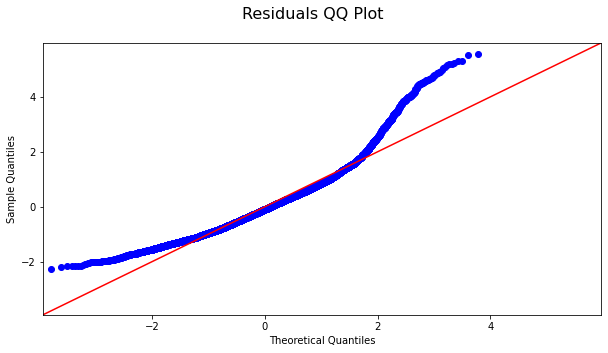

In [96]:
fig1 = sm.graphics.qqplot(m1.resid, dist=stats.norm, line='45', fit=True)

fig1.suptitle('Residuals QQ Plot', fontsize=16)
fig1.set_size_inches(10, 5)

Price will be compared to all variables and evaluated.

In [97]:
m2 = sm.OLS(y_train, sm.add_constant(X_train_final)).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     557.9
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        05:12:35   Log-Likelihood:            -1.6715e+05
No. Observations:               12875   AIC:                         3.345e+05
Df Residuals:                   12787   BIC:                         3.351e+05
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.554e+06   3.86e+04    -66.133      0.000   -2.63e+06   -2.48e+06
sqft_living_log  3.034e+05   4336.240     69.975      0.000    2.95e+05    3.12e+05
sqft_lot_log     5.072e+04   1935.940     26.200      0.000    4.69e+04    5.45e+04
bedrooms_log    -3.776e+04   4730.011     -7.983      0.000    -4.7e+04   -2.85e+04
condition_2      8.379e+04   2.84e+04      2.946      0.003     2.8e+04     1.4e+05
condition_3       1.11e+05   2.67e+04      4.164      0.000    5.88e+04    1.63e+05
condition_4       1.27e+05   2.67e+04      4.761      0.000    7.47e+04    1.79e+05
condition_5      1.616e+05   2.68e+04      6.024      0.000    1.09e+05    2.14e+05
basement_1      -3.503e+04   2504.667    -13.986      0.000   -3.99e+04   -3.01e+04
zipcode_98002    1.652e+04    1.1e+04      1.497      0.134   -5109.765    3.81e+04
zipcode_98003    2.554e+04   1.05e+04      2.437      0.015    4995.927    4.61e+04
zipcode_98004    6.748e+05   1.15e+04     58.521      0.000    6.52e+05    6.97e+05
zipcode_98005    3.928e+05   1.23e+04     31.936      0.000    3.69e+05    4.17e+05
zipcode_98006    3.372e+05   9571.849     35.232      0.000    3.18e+05    3.56e+05
zipcode_98007    3.276e+05   1.29e+04     25.382      0.000    3.02e+05    3.53e+05
zipcode_98008    2.861e+05   1.08e+04     26.471      0.000    2.65e+05    3.07e+05
zipcode_98010    6.881e+04   1.55e+04      4.434      0.000    3.84e+04    9.92e+04
zipcode_98011    1.776e+05   1.15e+04     15.478      0.000    1.55e+05       2e+05
zipcode_98014     1.01e+05   1.47e+04      6.885      0.000    7.22e+04     1.3e+05
zipcode_98019    7.089e+04    1.2e+04      5.883      0.000    4.73e+04    9.45e+04
zipcode_98022    8130.1713   1.22e+04      0.667      0.505   -1.58e+04     3.2e+04
zipcode_98023    1.511e+04   8848.553      1.708      0.088   -2235.108    3.25e+04
zipcode_98024    1.488e+05   1.89e+04      7.879      0.000    1.12e+05    1.86e+05
zipcode_98027    2.251e+05   9599.625     23.452      0.000    2.06e+05    2.44e+05
zipcode_98028    1.485e+05   1.04e+04     14.312      0.000    1.28e+05    1.69e+05
zipcode_98029     2.75e+05   9938.372     27.674      0.000    2.56e+05    2.95e+05
zipcode_98030    1.133e+04   1.02e+04      1.109      0.267   -8693.106    3.13e+04
zipcode_98031    2.476e+04   1.03e+04      2.415      0.016    4664.778    4.48e+04
zipcode_98032     3.47e+04   1.34e+04      2.594      0.010    8477.279    6.09e+04
zipcode_98033    3.988e+05   9617.190     41.469      0.000     3.8e+05    4.18e+05
zipcode_98034    2.188e+05   8861.156     24.691      0.000    2.01e+05    2.36e+05
zipcode_98038    2.648e+04   8573.111      3.088      0.002    9671.447    4.33e+04
zipcode_98039    8.744e+05   3.58e+04     24.392      0.000    8.04e+05    9.45e+05
zipcode_98040    5.769e+05   1.18e+04     48.957      0.000

R^2 increases drastically to 0.791. This is a huge improvement in the model. When inspecting the p-values  of the variables, it is noted that some have values higher than 0.05. This means that they are not statistically significant in the model, and can be dropped. These features include some zipcode values and the 2 and 3 age category.The age categories imply that houses with ages from 20-60 years don't affect the price alot

In [98]:
# p values > 0.05

to_drop = ['zipcode_98002','zipcode_98022', 'zipcode_98023','zipcode_98030','zipcode_98042', 'zipcode_98092', 'age_category_2','age_category_3' ]

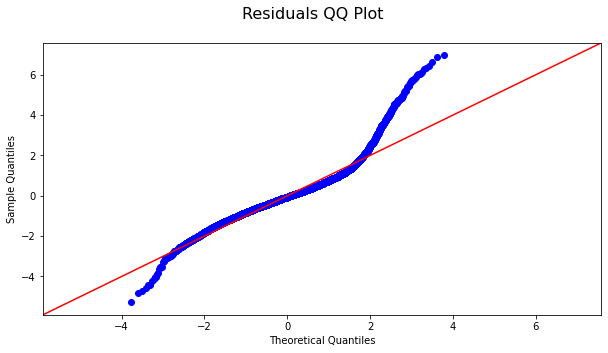

In [99]:
fig2 = sm.graphics.qqplot(m2.resid, dist=stats.norm, line='45', fit=True)

fig2.suptitle('Residuals QQ Plot', fontsize=16)
fig2.set_size_inches(10, 5)

In [100]:
# dropping the values with a high p-value

X_train_final.drop(labels = to_drop, axis = 1, inplace = True)

In [101]:
m3 = sm.OLS(y_train, sm.add_constant(X_train_final)).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     613.1
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        05:12:36   Log-Likelihood:            -1.6716e+05
No. Observations:               12875   AIC:                         3.345e+05
Df Residuals:                   12795   BIC:                         3.351e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.548e+06   3.78e+04    -67.323      0.000   -2.62e+06   -2.47e+06
sqft_living_log   3.05e+05   4323.450     70.544      0.000    2.97e+05    3.13e+05
sqft_lot_log     5.022e+04   1927.782     26.052      0.000    4.64e+04     5.4e+04
bedrooms_log    -4.033e+04   4692.791     -8.594      0.000   -4.95e+04   -3.11e+04
condition_2      8.344e+04   2.85e+04      2.932      0.003    2.77e+04    1.39e+05
condition_3      1.111e+05   2.67e+04      4.165      0.000    5.88e+04    1.63e+05
condition_4      1.261e+05   2.67e+04      4.724      0.000    7.38e+04    1.78e+05
condition_5      1.599e+05   2.68e+04      5.960      0.000    1.07e+05    2.12e+05
basement_1      -3.392e+04   2489.570    -13.624      0.000   -3.88e+04    -2.9e+04
zipcode_98003    1.481e+04   8541.885      1.734      0.083   -1928.610    3.16e+04
zipcode_98004    6.627e+05   9790.158     67.693      0.000    6.44e+05    6.82e+05
zipcode_98005    3.796e+05   1.07e+04     35.579      0.000    3.59e+05    4.01e+05
zipcode_98006    3.272e+05   7369.365     44.399      0.000    3.13e+05    3.42e+05
zipcode_98007    3.156e+05   1.14e+04     27.762      0.000    2.93e+05    3.38e+05
zipcode_98008    2.714e+05   8860.453     30.626      0.000    2.54e+05    2.89e+05
zipcode_98010    6.016e+04   1.43e+04      4.208      0.000    3.21e+04    8.82e+04
zipcode_98011    1.685e+05   9739.940     17.297      0.000    1.49e+05    1.88e+05
zipcode_98014    9.283e+04   1.34e+04      6.938      0.000    6.66e+04    1.19e+05
zipcode_98019    6.247e+04   1.04e+04      5.986      0.000     4.2e+04    8.29e+04
zipcode_98024    1.393e+05   1.79e+04      7.774      0.000    1.04e+05    1.74e+05
zipcode_98027    2.153e+05   7454.804     28.886      0.000    2.01e+05     2.3e+05
zipcode_98028    1.387e+05   8432.856     16.446      0.000    1.22e+05    1.55e+05
zipcode_98029    2.663e+05   7849.144     33.924      0.000    2.51e+05    2.82e+05
zipcode_98031    1.643e+04   8239.797      1.994      0.046     276.338    3.26e+04
zipcode_98032    2.328e+04   1.19e+04      1.953      0.051     -86.404    4.66e+04
zipcode_98033    3.884e+05   7458.630     52.072      0.000    3.74e+05    4.03e+05
zipcode_98034    2.075e+05   6438.090     32.237      0.000    1.95e+05     2.2e+05
zipcode_98038    1.826e+04   6064.170      3.011      0.003    6372.825    3.01e+04
zipcode_98039    8.622e+05   3.53e+04     24.396      0.000    7.93e+05    9.32e+05
zipcode_98040    5.632e+05   1.01e+04     56.040      0.000    5.44e+05    5.83e+05
zipcode_98045    8.927e+04      1e+04      8.895      0.000    6.96e+04    1.09e+05
zipcode_98052      2.9e+05   6152.171     47.142      0.000    2.78e+05    3.02e+05
zipcode_98053    2.358e+05   7369.277     31.996      0.000    2.21e+05     2.5e+05
zipcode_98055     5.33e+04   8408.566      6.339      0.000

There is no improvement to the model after these changes. It can also be notes that some 2 additional zipcode variable have a p-value higher than 0.05. These will also be removed

In [102]:
to_drop2 = ['zipcode_98003', 'zipcode_98032']

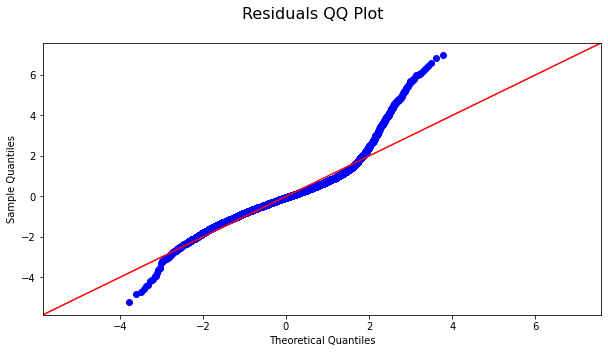

In [103]:
fig3 = sm.graphics.qqplot(m3.resid, dist=stats.norm, line='45', fit=True)

fig3.suptitle('Residuals QQ Plot', fontsize=16)
fig3.set_size_inches(10, 5)

In [104]:
# dropping the columns with the high p-values

X_train_final.drop(labels = to_drop2, axis = 1, inplace = True)

In [105]:
m4 = sm.OLS(y_train, sm.add_constant(X_train_final)).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     628.8
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        05:12:37   Log-Likelihood:            -1.6717e+05
No. Observations:               12875   AIC:                         3.345e+05
Df Residuals:                   12797   BIC:                         3.351e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.544e+06   3.78e+04    -67.268      0.000   -2.62e+06   -2.47e+06
sqft_living_log   3.05e+05   4323.126     70.540      0.000    2.96e+05    3.13e+05
sqft_lot_log     5.012e+04   1927.668     25.999      0.000    4.63e+04    5.39e+04
bedrooms_log    -4.035e+04   4693.116     -8.597      0.000   -4.95e+04   -3.11e+04
condition_2      8.322e+04   2.85e+04      2.924      0.003    2.74e+04    1.39e+05
condition_3      1.113e+05   2.67e+04      4.171      0.000     5.9e+04    1.64e+05
condition_4      1.262e+05   2.67e+04      4.728      0.000    7.39e+04    1.79e+05
condition_5      1.598e+05   2.68e+04      5.957      0.000    1.07e+05    2.12e+05
basement_1      -3.383e+04   2489.718    -13.588      0.000   -3.87e+04    -2.9e+04
zipcode_98004    6.603e+05   9740.274     67.786      0.000    6.41e+05    6.79e+05
zipcode_98005    3.771e+05   1.06e+04     35.501      0.000    3.56e+05    3.98e+05
zipcode_98006    3.248e+05   7303.637     44.467      0.000     3.1e+05    3.39e+05
zipcode_98007    3.131e+05   1.13e+04     27.649      0.000    2.91e+05    3.35e+05
zipcode_98008    2.688e+05   8800.814     30.543      0.000    2.52e+05    2.86e+05
zipcode_98010    5.781e+04   1.43e+04      4.051      0.000    2.98e+04    8.58e+04
zipcode_98011     1.66e+05   9690.134     17.134      0.000    1.47e+05    1.85e+05
zipcode_98014    9.046e+04   1.33e+04      6.777      0.000    6.43e+04    1.17e+05
zipcode_98019    6.022e+04   1.04e+04      5.791      0.000    3.98e+04    8.06e+04
zipcode_98024    1.369e+05   1.79e+04      7.653      0.000    1.02e+05    1.72e+05
zipcode_98027     2.13e+05   7393.965     28.806      0.000    1.98e+05    2.27e+05
zipcode_98028    1.363e+05   8376.317     16.269      0.000     1.2e+05    1.53e+05
zipcode_98029     2.64e+05   7792.789     33.872      0.000    2.49e+05    2.79e+05
zipcode_98031    1.399e+04   8181.187      1.710      0.087   -2044.309       3e+04
zipcode_98033     3.86e+05   7396.618     52.188      0.000    3.72e+05    4.01e+05
zipcode_98034     2.05e+05   6355.359     32.257      0.000    1.93e+05    2.17e+05
zipcode_98038      1.6e+04   5993.879      2.669      0.008    4248.479    2.77e+04
zipcode_98039    8.598e+05   3.53e+04     24.333      0.000    7.91e+05    9.29e+05
zipcode_98040    5.608e+05      1e+04     56.060      0.000    5.41e+05     5.8e+05
zipcode_98045    8.691e+04   9990.430      8.700      0.000    6.73e+04    1.06e+05
zipcode_98052    2.876e+05   6074.093     47.353      0.000    2.76e+05       3e+05
zipcode_98053    2.336e+05   7313.693     31.938      0.000    2.19e+05    2.48e+05
zipcode_98055    5.084e+04   8349.990      6.088      0.000    3.45e+04    6.72e+04
zipcode_98056    1.101e+05   6865.704     16.032      0.000    9.66e+04    1.24e+05
zipcode_98058    5.105e+04   6677.630      7.645      0.000

The model still doesn't improve with these changes.

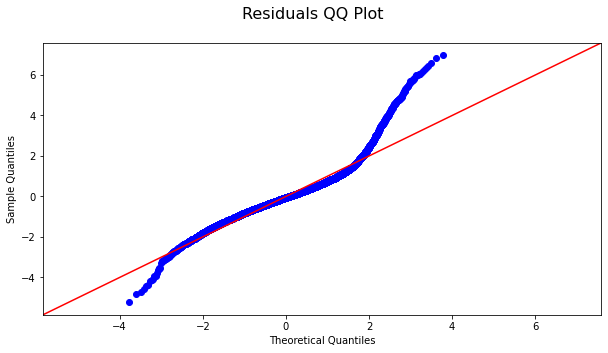

In [106]:
fig4 = sm.graphics.qqplot(m4.resid, dist=stats.norm, line='45', fit=True)

fig4.suptitle('Residuals QQ Plot', fontsize=16)
fig4.set_size_inches(10, 5)

Feature Ranking with Recursive Feature Elimination can be done to selects the most important features in the model.

In [107]:
# carrying out feature ranking

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=40)
selector = selector.fit(X_train_final, y_train)

In [108]:
# showing the ranking of the features

selector.ranking_

array([ 1, 18, 22, 15, 14, 13, 12, 29,  1,  1,  1,  1,  1, 24,  1,  4, 20,
        1,  1,  3,  1, 38,  1,  1, 37,  1,  1,  7,  1,  1, 25,  6, 26,  5,
        2, 19,  1,  1,  1,  1,  1,  1,  1,  8,  1,  9,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, 11, 21,  1, 10, 27,  1, 23, 28, 30,
        1, 35, 33, 16, 36, 17, 34, 31, 32])

In [111]:
estimators = selector.estimator_

In [112]:
# creating a list of the top 40 variables with their ranks and coefficients

top40 = list(zip(X_train_final.columns, selector.ranking_, estimators.coef_))

In [113]:
# creating a dataframe

final_df = pd.DataFrame(top40, columns = ['Variable', 'Rank', 'Coefficients'])
final_df

Variable  Rank   Coefficients
0   sqft_living_log     1  313705.970797
1      sqft_lot_log    18  600117.097801
2      bedrooms_log    22  317936.598643
3       condition_2    15  262822.104903
4       condition_3    14  246629.778179
5       condition_4    13  188630.050983
6       condition_5    12   98353.312278
7        basement_1    29  133305.030171
8     zipcode_98004     1  167031.959070
9     zipcode_98005     1  200095.735990
10    zipcode_98006     1  333854.305313
11    zipcode_98007     1  124645.532002
12    zipcode_98008     1  818374.282022
13    zipcode_98010    24  508131.696730
14    zipcode_98011     1  225238.679550
15    zipcode_98014     4  222546.247757
16    zipcode_98019    20  149149.562281
17    zipcode_98024     1  222023.422096
18    zipcode_98027     1  254777.721249
19    zipcode_98028     3  212367.605322
20    zipcode_98029     1  437350.431674
21    zipcode_98031    38  286961.098032
22    zipcode_98033     1  399996.770376
23    zipcode_98034     1  276563.420132
24    zipcode_98038    37  462996.907162
25    zipcode_98039     1  530605.669696
26    zipcode_98040     1  277476.588524
27    zipcode_98045     7  243166.448239
28    zipcode_98052     1  272385.682505
29    zipcode_98053     1  105029.266394
30    zipcode_98055    25  398498.620002
31    zipcode_98056     6  293606.651598
32    zipcode_98058    26  132864.373495
33    zipcode_98059     5  146510.222792
34    zipcode_98065     2  103185.932104
35    zipcode_98070    19  205993.548505
36    zipcode_98072     1  185884.087238
37    zipcode_98074     1   95141.801108
38    zipcode_98075     1  167888.152792
39    zipcode_98077     1  328758.975077

In [114]:
print(f'The intercept of the top 40 variables model is :{estimators.intercept_}')

The intercept of the top 40 variables model is :-2014987.8651287274


In [115]:
cols = final_df['Variable'].to_list()

In [116]:
X_train_final[cols]

sqft_living_log  sqft_lot_log  bedrooms_log  condition_2  condition_3  \
3725          8.032685      8.506132      1.386294            0            1   
21541         7.251345      7.130899      1.098612            0            1   
9541          7.570443      9.011402      1.098612            0            1   
17998         7.986165      8.659213      1.386294            0            0   
10147         7.958577      9.619399      1.386294            0            1   
...                ...           ...           ...          ...          ...   
8648          7.478735      9.104980      1.098612            0            1   
1361          8.278936      9.245708      1.098612            0            1   
1378          7.528332      8.994669      1.098612            0            0   
3469          7.229839      8.411833      1.098612            0            1   
7830          7.727535      9.822820      1.386294            0            1   

       condition_4  condition_5  basement_1  zipcode_98004  zipcode_98005  \
3725             0            0           1              0              0   
21541            0            0           1              0              0   
9541             0            0           0              0              0   
17998            0            1           1              0              0   
10147            0            0           1              0              0   
...            ...          ...         ...            ...            ...   
8648             0            0           1              0              0   
1361             0            0           1              0              0   
1378             1            0           0              0              0   
3469             0            0           0              0              0   
7830             0            0           0              0              0   

       ...  zipcode_98055  zipcode_98056  zipcode_98058  zipcode_98059  \
3725   ...              0              0              0              0   
21541  ...              0              0              0              0   
9541   ...              0              0              0              0   
17998  ...              0              0              0              0   
10147  ...              0              0              0              0   
...    ...            ...            ...            ...            ...   
8648   ...              0              0              0              0   
1361   ...              0              0              0              0   
1378   ...              0              0              0              0   
3469   ...              0              0              0              0   
7830   ...              0              0              0              0   

       zipcode_98065  zipcode_98070  zipcode_98072  zipcode_98074  \
3725               0              0              0              0   
21541              0              0              0              0   
9541               0              0              0              0   
17998              0              0              0              0   
10147              0              0              0              0   
...              ...            ...            ...            ...   
8648               0              0              0              0   
1361               0              0              0              0   
1378               0              0              0              0   
3469               0              0              0              0   
7830               0              0              0              0   

       zipcode_98075  zipcode_98077  
3725               0              0  
21541              0              0  
9541               0              0  
17998              0              0  
10147              0              0  
...              ...            ...  
8648               0              0  
1361               0              0  
1378               0              0  
3469               0   

In [119]:
# carrying out Recursive Feature Elimination Cross Validation 

model_RFECV = LinearRegression()

# Instantiate selector

selector = RFECV(model_RFECV, cv = 5)

# Fit selector

selector.fit(X_train_final, y_train)

# Printing the results the results
print("Was the column selected?")
for index, col in enumerate(X_train_final.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
sqft_living_log: True
sqft_lot_log: True
bedrooms_log: True
condition_2: True
condition_3: True
condition_4: True
condition_5: True
basement_1: True
zipcode_98004: True
zipcode_98005: True
zipcode_98006: True
zipcode_98007: True
zipcode_98008: True
zipcode_98010: True
zipcode_98011: True
zipcode_98014: True
zipcode_98019: True
zipcode_98024: True
zipcode_98027: True
zipcode_98028: True
zipcode_98029: True
zipcode_98031: True
zipcode_98033: True
zipcode_98034: True
zipcode_98038: True
zipcode_98039: True
zipcode_98040: True
zipcode_98045: True
zipcode_98052: True
zipcode_98053: True
zipcode_98055: True
zipcode_98056: True
zipcode_98058: True
zipcode_98059: True
zipcode_98065: True
zipcode_98070: True
zipcode_98072: True
zipcode_98074: True
zipcode_98075: True
zipcode_98077: True
zipcode_98102: True
zipcode_98103: True
zipcode_98105: True
zipcode_98106: True
zipcode_98107: True
zipcode_98108: True
zipcode_98109: True
zipcode_98112: True
zipcode_98115: True
zipcod

All the features have been selected, hence, the final model will have all these.

In [130]:
final_vars = X_train_final.columns.to_list()
X_test_final2 = X_test_final[final_vars]
X_train_final2 = X_train_final

In [132]:
# insantiate model

final_model = LinearRegression()

In [133]:
# Fitting the model

final_model.fit(X_train_final2, y_train)

LinearRegression()

In [135]:
# Scoring the model

final_model.score(X_test_final2, y_test)

0.7859773357477513

This model accounts for 78.6% of the variance in the price of the house, with the current variables. This is good

In [138]:
# calculating the MSE

mean_squared_error(y_test, final_model.predict(X_test_final2), squared=False)

107271.24739296678

The mean squared error of 107,271 means that on average, the predicted price of this model will be off from the real price of the house by $ 107,271.

In [145]:
# showig coefficients and intercept of the model

final = pd.Series(final_model.coef_, index=X_train_final2.columns, name="Coefficients")
print(final)
print()
print("Intercept:", final_model.intercept_)


sqft_living_log    304955.174024
sqft_lot_log        50118.233071
bedrooms_log       -40346.282576
condition_2         83223.213218
condition_3        111256.299012
                       ...      
floors_3.0         -16220.201083
age_category_1      56393.081288
age_category_4      16309.099154
age_category_5      42125.272658
age_category_6      34872.157528
Name: Coefficients, Length: 77, dtype: float64

Intercept: -2544183.7298027826


From the model, the sqft of the living area greatly affects the model. A single increse in the size of the living area, provided the other variables are constant, results in a 304,955 dollar increase in the price. Locations such as Medina (Zipcode-98039) cause a huge increase in the price. A house located in Medina increases the price of the house by 859,833 dollars.

In [147]:
final.sort_values(ascending = False)

zipcode_98039    859833.186398
zipcode_98004    660258.590852
zipcode_98112    620984.124629
zipcode_98040    560801.093469
zipcode_98109    556407.568661
                     ...      
zipcode_98031     13992.039417
floors_3.0       -16220.201083
floors_1.5       -16709.605994
basement_1       -33830.934283
bedrooms_log     -40346.282576
Name: Coefficients, Length: 77, dtype: float64

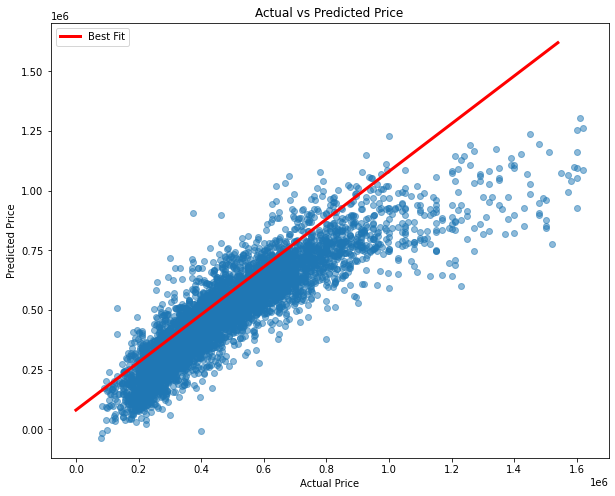

In [157]:
# checking the linearity assumption

preds = final_model.predict(X_test_final2)

fig, ax = plt.subplots(figsize = (10,8))

best_line = np.arange(y_test.min(), y_test.max())

ax.plot(best_line, ls="-", lw = 3, color="r", label="Best Fit")
ax.scatter(y_test, preds, alpha=0.5)

ax.set_title('Actual vs Predicted Price')
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend()
plt.savefig('Actual vs Prected price.png');

The above appearsIt can be observed that there is a linear relationship between the prices, hence, there is no violation of the linearity assumption.

## 4.5 Normality of Residuals

Linear regression assumes that model residuals should follow a normal distribution.

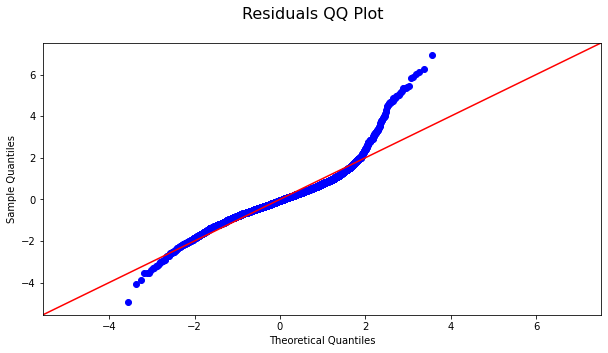

In [160]:
residuals = (y_test - preds)
final_fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
final_fig.suptitle('Residuals QQ Plot', fontsize=16)
final_fig.set_size_inches(10, 5);

Most of the residuals are along the straight line, hence, not violating the normality assumption.

The model will do a good job if the price of the house is not too high

## 4.6 Homoscedasticity


The homoscedasticity assumption states that for any value of x, the variance of the residuals is roughly the same. 

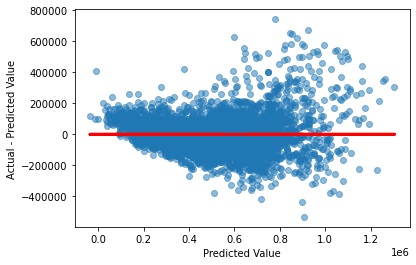

In [163]:
# plotting the distribution

fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)

ax.plot(preds, [0 for i in range(len(X_test_final2))], color = 'r', lw =3)

ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

The shape of the points is  roughly symmetrical across a line at y=0, hence, homoscedasticity has been satisfied

## 4.5 Final model validation

In [ ]:
# validation of final model results

# predictions = model3.predict(X_test_final)
# fig, ax = plt.subplots(figsize =(5,5))

# best_line = np.arange(y_test.min(), y_test.max())

# ax.plot(perfect_line,perfect_line, linestyle="--", color="black", label="Best Fit")
# ax.scatter(y_test, preds, alpha=0.5)

# ax.set_xlabel("Actual Price")
# ax.set_ylabel("Predicted Price")
# ax.legend();
# plt.savefig('Actual vs Predicted price.png')

In [ ]:
predictions = model3.predict(X_test_final)
residuals = (y_test - predictions)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);
plt.savefig('FinalModelQQPlot.png')